<a href="https://colab.research.google.com/github/erendagasan/Eren-Dagasan-Personal/blob/main/DENEME.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Requirements

In [1]:
!pip install -q bta-lib
!pip install -q ta
!pip install -q yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.2/92.2 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [2]:
import yfinance as yf
import btalib
import numpy as np
import pandas as pd
from ta.trend import PSARIndicator
from ta.momentum import WilliamsRIndicator
from ta.trend import AroonIndicator
from ta.volume import VolumePriceTrendIndicator
from ta.trend import CCIIndicator
from ta.momentum import ROCIndicator
from ta.trend import ADXIndicator
from datetime import datetime, timedelta
from sklearn.preprocessing import MinMaxScaler
import random
import numpy as np
import warnings
from google.colab import drive

drive.mount('/content/drive')

warnings.filterwarnings("ignore")
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_rows', 500)

Mounted at /content/drive


##Stock Lists

In [15]:
xu030 = [
        'VAKBN.IS',
        'AKBNK.IS',
        'AKSEN.IS',
        'ALARK.IS',
        'ARCLK.IS',
        'ASELS.IS',
        'BIMAS.IS',
        'EKGYO.IS',
        'ENKAI.IS',
        'EREGL.IS',
        'FROTO.IS',
        'GARAN.IS',
        'GUBRF.IS',
        'HEKTS.IS',
        'KRDMD.IS',
        'KCHOL.IS',
        'KOZAL.IS',
        'KOZAA.IS',
        'ODAS.IS',
        'PGSUS.IS',
        'SAHOL.IS',
        'SASA.IS',
        'PETKM.IS',
        'SISE.IS',
        'TAVHL.IS',
        'THYAO.IS',
        'TUPRS.IS',
        'TOASO.IS',
        'TCELL.IS',
        'ISCTR.IS',
        'YKBNK.IS'
          ]

xu100 = ['AEFES.IS',
 'AGHOL.IS',
 'AKBNK.IS',
 'AKFGY.IS',
 'AKSA.IS',
 'AKSEN.IS',
 'ALARK.IS',
 'ALBRK.IS',
 'ALFAS.IS',
 'ALKIM.IS',
 'ARCLK.IS',
 'ASELS.IS',
 'ASUZU.IS',
 'AYDEM.IS',
 'BAGFS.IS',
 'BASGZ.IS',
 'BERA.IS',
 'BIMAS.IS',
 'BIOEN.IS',
 'BRYAT.IS',
 'BUCIM.IS',
 'CCOLA.IS',
 'CEMTS.IS',
 'CIMSA.IS',
 'DOAS.IS',
 'DOHOL.IS',
 'ECILC.IS',
 'EGEEN.IS',
 'EKGYO.IS',
 'ENJSA.IS',
 'ENKAI.IS',
 'ERBOS.IS',
 'EREGL.IS',
 'EUREN.IS',
 'FENER.IS',
 'FROTO.IS',
 'GARAN.IS',
 'GENIL.IS',
 'GESAN.IS',
 'GLYHO.IS',
 'GSDHO.IS',
 'GUBRF.IS',
 'GWIND.IS',
 'HALKB.IS',
 'HEKTS.IS',
 'IPEKE.IS',
 'ISCTR.IS',
 'ISDMR.IS',
 'ISGYO.IS',
 'IZMDC.IS',
 'KARSN.IS',
 'KCAER.IS',
 'KCHOL.IS',
 'KERVT.IS',
 'KLRHO.IS',
 'KMPUR.IS',
 'KONTR.IS',
 'KONYA.IS',
 'KORDS.IS',
 'KOZAA.IS',
 'KOZAL.IS',
 'KRDMD.IS',
 'KZBGY.IS',
 'MAVI.IS',
 'MGROS.IS',
 'ODAS.IS',
 'OTKAR.IS',
 'OYAKC.IS',
 'PETKM.IS',
 'PGSUS.IS',
 'PSGYO.IS',
 'SAHOL.IS',
 'SASA.IS',
 'SELEC.IS',
 'SISE.IS',
 'SKBNK.IS',
 'SMRTG.IS',
 'SNGYO.IS',
 'SOKM.IS',
 'TAVHL.IS',
 'TCELL.IS',
 'THYAO.IS',
 'TKFEN.IS',
 'TKNSA.IS',
 'TMSN.IS',
 'TOASO.IS',
 'TSKB.IS',
 'TTKOM.IS',
 'TTRAK.IS',
 'TUKAS.IS',
 'TUPRS.IS',
 'TURSG.IS',
 'ULKER.IS',
 'ULUUN.IS',
 'VAKBN.IS',
 'VESBE.IS',
 'VESTL.IS',
 'YKBNK.IS',
 'YYLGD.IS',
 'ZOREN.IS']

xutum = ['AVOD.IS',
 'ACSEL.IS',
 'ADEL.IS',
 'ADESE.IS',
 'AFYON.IS',
 'AGHOL.IS',
 'AGESA.IS',
 'AKCNS.IS',
 'AKYHO.IS',
 'AKENR.IS',
 'AKFGY.IS',
 'ATEKS.IS',
 'AKSGY.IS',
 'AKMGY.IS',
 'AKSA.IS',
 'AKGRT.IS',
 'AKSUE.IS',
 'ALCAR.IS',
 'ALGYO.IS',
 'ALBRK.IS',
 'ALCTL.IS',
 'ALKIM.IS',
 'ALKA.IS',
 'AYCES.IS',
 'ANSGR.IS',
 'AEFES.IS',
 'ANHYT.IS',
 'ASUZU.IS',
 'ANGEN.IS',
 'ANELE.IS',
 'ARDYZ.IS',
 'ARENA.IS',
 'ARSAN.IS',
 'ATAGY.IS',
 'AGYO.IS',
 'ATSYH.IS',
 'ATLAS.IS',
 'ATATP.IS',
 'AVGYO.IS',
 'AVTUR.IS',
 'AVHOL.IS',
 'AYDEM.IS',
 'AYEN.IS',
 'AYES.IS',
 'AYGAZ.IS',
 'BAGFS.IS',
 'BAKAB.IS',
 'BALAT.IS',
 'BNTAS.IS',
 'BANVT.IS',
 'BASCM.IS',
 'BTCIM.IS',
 'BSOKE.IS',
 'BAYRK.IS',
 'BERA.IS',
 'BRKSN.IS',
 'BJKAS.IS',
 'BEYAZ.IS',
 'BLCYT.IS',
 'BRKO.IS',
 'BRLSM.IS',
 'BRMEN.IS',
 'BIZIM.IS',
 'BMSCH.IS',
 'BRSAN.IS',
 'BRYAT.IS',
 'BFREN.IS',
 'BOSSA.IS',
 'BRISA.IS',
 'BURCE.IS',
 'BURVA.IS',
 'BUCIM.IS',
 'CRFSA.IS',
 'CASA.IS',
 'CEOEM.IS',
 'CCOLA.IS',
 'COSMO.IS',
 'CRDFA.IS',
 'CANTE.IS',
 'CLEBI.IS',
 'CELHA.IS',
 'CEMAS.IS',
 'CEMTS.IS',
 'CMBTN.IS',
 'CMENT.IS',
 'CIMSA.IS',
 'CUSAN.IS',
 'DAGI.IS',
 'DAGHL.IS',
 'DAPGM.IS',
 'DARDL.IS',
 'DGATE.IS',
 'DMSAS.IS',
 'DENGE.IS',
 'DZGYO.IS',
 'DERIM.IS',
 'DERHL.IS',
 'DESA.IS',
 'DESPC.IS',
 'DEVA.IS',
 'DIRIT.IS',
 'DITAS.IS',
 'DOCO.IS',
 'DOBUR.IS',
 'DOHOL.IS',
 'DGNMO.IS',
 'DOGUB.IS',
 'DGGYO.IS',
 'DOAS.IS',
 'DOKTA.IS',
 'DURDO.IS',
 'DYOBY.IS',
 'ECZYT.IS',
 'EDIP.IS',
 'EGEEN.IS',
 'EGGUB.IS',
 'EGPRO.IS',
 'EGSER.IS',
 'EPLAS.IS',
 'ECILC.IS',
 'EKIZ.IS',
 'EMKEL.IS',
 'EMNIS.IS',
 'ENJSA.IS',
 'ERBOS.IS',
 'ERSU.IS',
 'ESCOM.IS',
 'ETILR.IS',
 'EUKYO.IS',
 'EUYO.IS',
 'ETYAT.IS',
 'EUHOL.IS',
 'FADE.IS',
 'FMIZP.IS',
 'FENER.IS',
 'FLAP.IS',
 'FONET.IS',
 'FORMT.IS',
 'FRIGO.IS',
 'GWIND.IS',
 'GSRAY.IS',
 'GARFA.IS',
 'GRNYO.IS',
 'GEDIK.IS',
 'GEDZA.IS',
 'GLCVY.IS',
 'GENTS.IS',
 'GEREL.IS',
 'GESAN.IS',
 'GLBMD.IS',
 'GLYHO.IS',
 'GOODY.IS',
 'GOLTS.IS',
 'GOZDE.IS',
 'GSDDE.IS',
 'GSDHO.IS',
 'GLRYH.IS',
 'HLGYO.IS',
 'HATEK.IS',
 'HDFGS.IS',
 'HEDEF.IS',
 'HTTBT.IS',
 'HUBVC.IS',
 'HURGZ.IS',
 'ICBCT.IS',
 'RHEAG.IS',
 'IEYHO.IS',
 'IDEAS.IS',
 'IDGYO.IS',
 'IHEVA.IS',
 'IHLGM.IS',
 'IHGZT.IS',
 'IHLAS.IS',
 'IHYAY.IS',
 'INDES.IS',
 'INFO.IS',
 'INTEM.IS',
 'IPEKE.IS',
 'ISDMR.IS',
 'ISFIN.IS',
 'ISGYO.IS',
 'ISGSY.IS',
 'ISMEN.IS',
 'ISYAT.IS',
 'ISBIR.IS',
 'ITTFH.IS',
 'IZINV.IS',
 'IZMDC.IS',
 'IZFAS.IS',
 'JANTS.IS',
 'KFEIN.IS',
 'KLKIM.IS',
 'KAPLM.IS',
 'KRDMA.IS',
 'KRDMB.IS',
 'KAREL.IS',
 'KARSN.IS',
 'KRTEK.IS',
 'KARTN.IS',
 'KATMR.IS',
 'KENT.IS',
 'KERVT.IS',
 'KERVN.IS',
 'KZBGY.IS',
 'KLGYO.IS',
 'KLRHO.IS',
 'KLMSN.IS',
 'KNFRT.IS',
 'KONTR.IS',
 'KONYA.IS',
 'KONKA.IS',
 'KORDS.IS',
 'KRGYO.IS',
 'KRSTL.IS',
 'KRONT.IS',
 'KSTUR.IS',
 'KUVVA.IS',
 'KUYAS.IS',
 'KUTPO.IS',
 'LIDFA.IS',
 'LINK.IS',
 'LOGO.IS',
 'LKMNH.IS',
 'LUKSK.IS',
 'MAKTK.IS',
 'MAGEN.IS',
 'MARKA.IS',
 'MAALT.IS',
 'MRSHL.IS',
 'MRGYO.IS',
 'MARTI.IS',
 'MAVI.IS',
 'MZHLD.IS',
 'MEDTR.IS',
 'MEGAP.IS',
 'MNDRS.IS',
 'MEPET.IS',
 'MERIT.IS',
 'MERKO.IS',
 'METUR.IS',
 'METRO.IS',
 'MTRYO.IS',
 'MGROS.IS',
 'MIPAZ.IS',
 'MSGYO.IS',
 'MPARK.IS',
 'MMCAS.IS',
 'MNDTR.IS',
 'NATEN.IS',
 'NTHOL.IS',
 'NETAS.IS',
 'NIBAS.IS',
 'NUHCM.IS',
 'NUGYO.IS',
 'ORGE.IS',
 'ORMA.IS',
 'OSMEN.IS',
 'OSTIM.IS',
 'OTKAR.IS',
 'OTTO.IS',
 'OYAKC.IS',
 'OYAYO.IS',
 'OYLUM.IS',
 'OZKGY.IS',
 'OZGYO.IS',
 'OZRDN.IS',
 'PAMEL.IS',
 'PNLSN.IS',
 'PAGYO.IS',
 'PAPIL.IS',
 'PRKME.IS',
 'PARSN.IS',
 'PEKGY.IS',
 'PENGD.IS',
 'PENTA.IS',
 'PEGYO.IS',
 'PSDTC.IS',
 'PKENT.IS',
 'PETUN.IS',
 'PINSU.IS',
 'PNSUT.IS',
 'PKART.IS',
 'POLHO.IS',
 'POLTK.IS',
 'PRZMA.IS',
 'QNBFL.IS',
 'QNBFB.IS',
 'QUAGR.IS',
 'RALYH.IS',
 'RAYSG.IS',
 'RYGYO.IS',
 'RYSAS.IS',
 'RODRG.IS',
 'ROYAL.IS',
 'RTALB.IS',
 'RUBNS.IS',
 'SAFKR.IS',
 'SANEL.IS',
 'SANFM.IS',
 'SANKO.IS',
 'SAMAT.IS',
 'SARKY.IS',
 'SAYAS.IS',
 'SEKUR.IS',
 'SELEC.IS',
 'SELGD.IS',
 'SNKRN.IS',
 'SRVGY.IS',
 'SEYKM.IS',
 'SILVR.IS',
 'SNGYO.IS',
 'SMART.IS',
 'SODSN.IS',
 'SKTAS.IS',
 'SONME.IS',
 'SNPAM.IS',
 'SUMAS.IS',
 'SUNTK.IS',
 'SEKFK.IS',
 'SKBNK.IS',
 'SOKM.IS',
 'TATGD.IS',
 'TEKTU.IS',
 'TKFEN.IS',
 'TKNSA.IS',
 'TMPOL.IS',
 'TETMT.IS',
 'TGSAS.IS',
 'TRGYO.IS',
 'TLMAN.IS',
 'TSPOR.IS',
 'TDGYO.IS',
 'TSGYO.IS',
 'TUCLK.IS',
 'TUKAS.IS',
 'TRCAS.IS',
 'TMSN.IS',
 'PRKAB.IS',
 'TTKOM.IS',
 'TTRAK.IS',
 'TBORG.IS',
 'TURGG.IS',
 'HALKB.IS',
 'ISBTR.IS',
 'KLNMA.IS',
 'TSKB.IS',
 'TURSG.IS',
 'VAKBN.IS',
 'UFUK.IS',
 'ULAS.IS',
 'ULUFA.IS',
 'ULUSE.IS',
 'ULUUN.IS',
 'UMPAS.IS',
 'USAK.IS',
 'UZERB.IS',
 'ULKER.IS',
 'UNLU.IS',
 'VAKFN.IS',
 'VKGYO.IS',
 'VKFYO.IS',
 'VAKKO.IS',
 'VANGD.IS',
 'VBTYZ.IS',
 'VERUS.IS',
 'VERTU.IS',
 'VESBE.IS',
 'VESTL.IS',
 'VKING.IS',
 'YAPRK.IS',
 'YATAS.IS',
 'YYLGD.IS',
 'YAYLA.IS',
 'YGGYO.IS',
 'YGYO.IS',
 'YYAPI.IS',
 'YESIL.IS',
 'YBTAS.IS',
 'YONGA.IS',
 'YKSLN.IS',
 'YUNSA.IS',
 'ZEDUR.IS',
 'ZOREN.IS']

url = 'https://en.m.wikipedia.org/wiki/Nasdaq-100'
nasdaq100 = pd.read_html(url, attrs={'id': "constituents"})[0]
nasdaq100 = nasdaq100["Ticker"].to_list()

##Functions

In [4]:
def create_indicators(data):
  # 15 DKLIK İCİN
  # EMA 33, 165, 660

  # ICHIMOKU
  # MOMENTUM INDIKATORU EKLE
  # ELLIOT EKLE
  # FIBONACCI

  # 50 - 200Ü KIRIYORSA GOLDEN CROSS - TAM TERSİ SAĞLAM SAT (DATA COK BÜYÜYOR)

  # Below 30 is oversold, upper 70 is overbought
  data["RSI"] = btalib.rsi(data["Close"], period=14).df

  #If little period conflicts with the bigger one it means buy else sell.
  data["SMA5"] = btalib.sma(data['Close'], period=5).df
  data["SMA9"] = btalib.sma(data['Close'], period=9).df
  data["SMA10"] = btalib.sma(data['Close'], period=10).df
  data["SMA14"] = btalib.sma(data['Close'], period=14).df
  data["SMA20"] = btalib.sma(data['Close'], period=20).df
  data["SMA21"] = btalib.sma(data['Close'], period=21).df
  data["SMA50"] = btalib.sma(data['Close'], period=50).df
  data["SMA200"] = btalib.sma(data['Close'], period=200).df

  data["EMA5"] = btalib.ema(data['Close'], period=5).df
  data["EMA14"] = btalib.ema(data['Close'], period=14).df
  data["EMA21"] = btalib.ema(data['Close'], period=21).df
  data["EMA50"] = btalib.ema(data['Close'], period=50).df

  #A reading below 20 generally represents an oversold market and a reading above 80 an overbought market. Look only STOCH-D.
  data["STOCH-K"] = btalib.stoch(data['High'], data['Low'], data['Close']).df["k"]
  data["STOCH-D"] = btalib.stoch(data['High'], data['Low'], data['Close']).df["d"]

  #When the MACD line crosses above the signal line, it generates a buy signal. This indicates a potential bullish trend reversal.
  #Additionally, monitor the MACD histogram. When the histogram bars turn positive (change from negative to positive), it confirms the buy signal and suggests increasing buying pressure.
  data["MACD"] = btalib.macd(data['Close']).df["macd"]
  data["SIGNAL"] = btalib.macd(data['Close']).df["signal"]
  data["HISTOGRAM"] = btalib.macd(data['Close']).df["histogram"]

  #Buy Signal: When the price of the stock touches or crosses below the lower Bollinger Band, it can be considered a buy signal.
  #This suggests that the stock may be oversold, and a potential price rebound is expected.
  #Sell Signal: When the price of the stock touches or crosses above the upper Bollinger Band, it can be considered a sell signal.
  #This indicates that the stock may be overbought, and a potential price correction is expected.
  data["BB-UPPER"] = btalib.bbands(data['Close']).df['top']
  data["BB-MID"] = btalib.bbands(data['Close']).df['mid']
  data["BB-LOWER"] = btalib.bbands(data['Close']).df['bot']

  #When the current price of the stock falls below a certain number of standard deviations (GET THE MIN AND MAX VALUE OF THE COLUMN AND MAKE IT THE THRESHOLD)
  #from the mean, it generates a buy signal. This suggests that the price has deviated significantly from the average and may present a buying opportunity.
  data["STDEV"] = data["Close"].rolling(window=10).std()

  #Generate a buy signal when the price crosses above the PSAR.
  #This indicates a potential reversal in the downward trend and suggests a buying opportunity.
  data["PSAR"] = PSARIndicator(data["High"], data["Low"], data["Close"]).psar()

  #Williams
  #Use the Williams Percent Range (%R) formula to calculate the %R values based on historical price data.
  #The %R values range from -100 to 0, where values close to -100 indicate oversold conditions and values close to 0 indicate overbought conditions.
  #Generate a buy signal when the %R value crosses above a certain threshold (e.g., -80) from below.
  #This indicates a potential reversal from oversold conditions and suggests a buying opportunity.
  data["WILLIAMS"] = WilliamsRIndicator(data["High"], data["Low"], data["Close"]).williams_r()

  #The difference between these two lines indicates whether there is overbought (a positive number) or oversold (a negative number).
  data["AROON"] = AroonIndicator(close=data["Close"], window=25).aroon_indicator()

  #obv
  data["OBV"] = VolumePriceTrendIndicator(close=data['Close'], volume=data['Volume']).volume_price_trend()

  #CCI
  data['CCI'] = CCIIndicator(close=data['Close'], low=data["Low"], high=data["High"], window=14).cci()

  #ROC
  data['ROC'] = ROCIndicator(close=data['Close'], window=5).roc()

  #BULLBEARPOWER
  data['BULL'] = data['High'] - (data['High'].rolling(13).max() + data['Low'].rolling(13).min()) / 2
  data['BEAR'] = data['Low'] - (data['High'].rolling(13).max() + data['Low'].rolling(13).min()) / 2

  #ADX
  adx_indicator = ADXIndicator(high=data['High'], low=data['Low'], close=data['Close'], window=14)
  data['ADX'] = adx_indicator.adx()
  data['+DI'] = adx_indicator.adx_pos()
  data['-DI'] = adx_indicator.adx_neg()

  data = data.dropna()
  data = data.reset_index()
  return data

def score(data):
  scaler = MinMaxScaler(feature_range=(0, 100))
  scores = []

  for row in range(data.shape[0]):
    score = 0

    if data["RSI"][row] < 30:
      score+=1
    elif data["RSI"][row] > 70:
      score-=1

    if row > 0 and data["RSI"].iloc[row-1] > 63 and data["RSI"].iloc[row] < 63:
      score-=1

    if row > 0 and data["RSI"].iloc[row-1] > 49 and data["RSI"].iloc[row] < 49:
      score-=1.5
    elif row > 0 and data["RSI"].iloc[row-1] < 50 and data["RSI"].iloc[row] > 50:
      score+=1.5

    if data["SMA5"].iloc[row] > data["SMA10"].iloc[row]:
      score+=1.5
    else:
      score-=1.5

    if row > 0 and data['SMA5'].iloc[row-1] < data['SMA10'].iloc[row-1] and data['SMA5'].iloc[row] > data['SMA10'].iloc[row]:
      score+=1
    else:
      score-=1

    # if data["SMA9"][row] > data["SMA14"][row]:
    #   score+=1
    # else:
    #   score-=1

    # if row > 0 and data['SMA9'].iloc[row-1] < data['SMA14'].iloc[row-1] and data['SMA9'].iloc[row] > data['SMA14'].iloc[row]:
    #   score+=1
    # else:
    #   score-=1

    if data["SMA14"][row] > data["SMA21"][row]:
      score+=1
    else:
      score-=1

    if row > 0 and data['SMA14'].iloc[row-1] < data['SMA21'].iloc[row-1] and data['SMA14'].iloc[row] > data['SMA21'].iloc[row]:
      score+=1
    else:
      score-=1

    if row > 1 and data['SMA20'].iloc[row-1] < data["Close"].iloc[row-1] and data['SMA20'].iloc[row] < data["Close"].iloc[row]:
      score+=1
    else:
      score-=1

    if data["SMA21"][row] > data["SMA50"][row]:
      score+=1
    else:
      score-=1

    if row > 0 and data['SMA21'].iloc[row-1] < data['SMA50'].iloc[row-1] and data['SMA21'].iloc[row] > data['SMA50'].iloc[row]:
      score+=1
    else:
      score-=1

    if row > 0 and data['SMA50'].iloc[row-1] < data['SMA200'].iloc[row-1] and data['SMA50'].iloc[row] > data['SMA200'].iloc[row]:
      score+=2

    # if data['Close'][row] > data["EMA14"][row]:
    #   score+=1
    # else:
    #   score-=1

    # if data["EMA5"][row] > data["EMA14"][row]:
    #   score+=0.5
    # else:
    #   score-=0.5

    # if row > 0 and data['EMA5'].iloc[row-1] < data['EMA14'].iloc[row-1] and data['EMA5'].iloc[row] > data['EMA14'].iloc[row]:
    #   score+=0.5
    # else:
    #   score-=0.5

    # if data["EMA14"][row] > data["EMA21"][row]:
    #   score+=1
    # else:
    #   score-=1

    # if row > 0 and data['EMA14'].iloc[row-1] < data['EMA21'].iloc[row-1] and data['EMA14'].iloc[row] > data['EMA21'].iloc[row]:
    #   score+=1
    # else:
    #   score-=1

    # if data["EMA21"][row] > data["EMA50"][row]:
    #   score+=1
    # else:
    #   score-=1

    # if row > 0 and data['EMA21'].iloc[row-1] < data['EMA50'].iloc[row-1] and data['EMA21'].iloc[row] > data['EMA50'].iloc[row]:
    #   score+=1
    # else:
    #   score-=1

    if data["STOCH-D"][row] <= 20:
      score+=1
    elif data["STOCH-D"][row] >= 80:
      score-=1

    if row > 0 and data["STOCH-D"][row-1] > 65 and data["STOCH-D"][row] < 65:
      score-=1
    elif row > 0 and data["STOCH-D"][row-1] < 35 and data["STOCH-D"][row] > 35:
      score=+1

    if data["MACD"][row] > data["SIGNAL"][row]:
      score+=1
    if row > 0 and data["MACD"][row] > data["SIGNAL"][row] and data["HISTOGRAM"][row-1] < 0 and data["HISTOGRAM"][row] > 0:
      score+=1
    if row > 0 and data["MACD"][row] < data["SIGNAL"][row] and data["HISTOGRAM"][row-1] > 0 and data["HISTOGRAM"][row] < 0:
      score-=1
    if data["MACD"][row] < data["SIGNAL"][row]:
      score-=1

    if data['MACD'].tail(7).mean() > 0:
      score+=1
    else:
      score-=1

    if data['MACD'].tail(30).mean() > 0:
      score+=1
    else:
      score-=1

    # if data["BB-LOWER"].iloc[row] > data["Close"].iloc[row]:
    #     score+=1
    # elif data["BB-UPPER"].iloc[row] < data["Close"].iloc[row]:
    #     score-=1
    # if data["BB-MID"].iloc[row] < data["Close"].iloc[row] and data["BB-LOWER"].iloc[row] - data["Close"].iloc[row] < data["BB-MID"].iloc[row] - data["Close"].iloc[row]:
    #     score+=1
    # elif data["BB-MID"].iloc[row] > data["Close"].iloc[row] and data["BB-UPPER"].iloc[row] - data["Close"].iloc[row] < data["BB-MID"].iloc[row] - data["Close"].iloc[row]:
    #     score-=1

    if (data["STDEV"].max() + data["STDEV"].min()) / 2 > data["STDEV"][row]:
      score+=1
    else:
      score-=1

    if data["PSAR"][row] < data["Close"][row]:
      score+=1
    else:
      score-=1

    if data["WILLIAMS"][row] < -80:
      score+=1
    elif data["WILLIAMS"][row] > -20:
      score-=1

    if data["AROON"][row] > 0:
      score-=1
    else:
      score+=1

    if row > 0 and data["OBV"][row-1] < data["OBV"][row] and data["Close"][row] > data["Close"][row-1]:
      score+=1
    elif row > 0 and data["OBV"][row-1] > data["OBV"][row] and data["Close"][row] < data["Close"][row-1]:
      score-=1

    if row > 0 and (data['CCI'][row] > -100) & (data['CCI'][row-1] <= -100):
      score+=1
    elif row > 0 and (data['CCI'][row] < 100) & (data['CCI'][row-1] >= 100):
      score-=1

    if data["ROC"][row] > 0:
      score+=1
    elif data["ROC"][row] < 0:
      score-=1

    if data["BULL"][row] > 0:
      score+=1
    elif data["BEAR"][row] < 0:
      score-=1

    if (data['ADX'][row] > 25) and (data['+DI'][row] > data['-DI'][row]):
      score+=1
    if data['ADX'][row] > data['+DI'][row] and data['ADX'][row] > data['-DI'][row]:
      score+=1
    if data['ADX'][row] < data['+DI'][row] and data['ADX'][row] < data['-DI'][row]:
      score-=1

    elif (data['ADX'][row] > 40) and (data['+DI'][row] < data['-DI'][row]):
      score-=1

    scores.append(score)

  data["SCORE"] = scores
  data["SCORE"] = scaler.fit_transform(data["SCORE"].values.reshape(-1, 1))
  return data

def save_to_excel(stock, data):
  output_file = stock + ":" + start + ":" + end + '.xlsx'
  writer = pd.ExcelWriter(output_file)
  data.to_excel(writer, index=True, sheet_name=stock)
  writer.save()

def buy_or_sell(stock, data, balance, upper_score, lower_score):
  stock_balance = 0
  transactions = []

  for row in range(data.shape[0]):
    if row > 0 and data["SCORE"].iloc[row] >= upper_score and data["SCORE"].iloc[row-1] < upper_score and balance > data["Close"].iloc[row]:
      stock_balance = balance / data["Close"].iloc[row]
      balance-= stock_balance*data["Close"].iloc[row]
      transactions.append([stock, "BUY", data["Date"].iloc[row], data["Close"].iloc[row], stock_balance, balance, data["SCORE"].iloc[row]])

    elif row > 0 and data["SCORE"].iloc[row] <= lower_score and data["SCORE"].iloc[row-1] > lower_score and stock_balance > 1:
      balance+=stock_balance*data["Close"].iloc[row]
      stock_balance-=stock_balance
      transactions.append([stock,"SELL", data["Date"].iloc[row], data["Close"].iloc[row], stock_balance, balance, data["SCORE"].iloc[row]])

  transactions_df = pd.DataFrame(transactions, columns=["STOCK","B/S", "DATE", "PRICE", "STOCK BALANCE", "TRY BALANCE", "SCORE"])
  if transactions_df.empty != True:
    transactions_df["LAST PRICE"] = data["Close"].iloc[-1]
  return transactions_df

def test_the_market(market, buy_threshold, sell_threshold, start, end, balance, today):
  test_df = pd.DataFrame()

  for stock in market:
    try:
      data = yf.download(stock, start, end, progress=False)
      data = create_indicators(data)
      data = score(data)
      simulation_df = buy_or_sell(stock, data, balance=balance, upper_score=buy_threshold, lower_score=sell_threshold)
      test_df = pd.concat([test_df, simulation_df])

    except:
      print("Data error with stock named: " + stock)

  test_df = test_df.reset_index().drop(["index"], axis=1)
  return_df = pd.DataFrame()

  for stock in xu030:
    stock_df = test_df[test_df["STOCK"] == stock]

    if stock_df.empty != True:
      if stock_df['B/S'].iloc[-1] == "BUY":
        add = pd.DataFrame({"STOCK": [stock_df["STOCK"].iloc[-1]], "B/S": ["CLOSE"], "DATE": [today], "PRICE": [stock_df["LAST PRICE"].iloc[-1]],
                            'STOCK BALANCE': [0], 'TRY BALANCE': [(stock_df["STOCK BALANCE"].iloc[-1]) * stock_df["LAST PRICE"].iloc[-1]], 'LAST PRICE' :[stock_df["LAST PRICE"].iloc[-1]]})

        stock_df = stock_df.append(add)
        return_df = pd.concat([return_df, stock_df], ignore_index=True)
      else:
        return_df = pd.concat([return_df, stock_df], ignore_index=True)

  return return_df

##Variables

In [5]:
today = datetime.today().date()
tomorrow = today + timedelta(days=1)

start="2021-06-01"
end = tomorrow.strftime("%Y-%m-%d")

balance = 2000
buy_threshold = 77
sell_threshold = 51

#V1.0

##Buy or Sell Informations on Stocks

In [ ]:
buy_stocks = []
sell_stocks = []
simulation_stocks = pd.DataFrame()

lookup_table = []
portfolio = []

for stock in xu030:
  try:
    data = yf.download(stock, start=start, end=end, progress=False)
    data = create_indicators(data)
    data = score(data)

    if stock in lookup_table:
      # save_to_excel(stock, data)
      portfolio.append([data.tail(1)["Date"].item(), stock, data.tail(1)["Close"].item(), data.tail(1)["SCORE"].item(),
                        "BUY" if data["SCORE"].iloc[-1] > buy_threshold and data["SCORE"].iloc[-2] < buy_threshold else
                        "SELL" if data["SCORE"].iloc[-1] < sell_threshold and data["SCORE"].iloc[-2] > sell_threshold else
                        "SELL" if data["SCORE"].iloc[-1] < sell_threshold else "HOLD"])

    if data["SCORE"].iloc[-1] > buy_threshold and data["SCORE"].iloc[-2] < buy_threshold:
      buy_stocks.append([data.tail(1)["Date"].item(), stock, data.tail(1)["Close"].item(), data.tail(1)["SCORE"].item(), "BUY"])
      simulation_df = buy_or_sell(stock, data, balance=2000, upper_score=buy_threshold, lower_score=sell_threshold)
      simulation_stocks = pd.concat([simulation_stocks, simulation_df])

    elif data["SCORE"].iloc[-1] < sell_threshold and data["SCORE"].iloc[-2] > sell_threshold:
      sell_stocks.append([data.tail(1)["Date"].item(), stock, data.tail(1)["Close"].item(), data.tail(1)["SCORE"].item(), "SELL"])

  except:
    print("Data error at the stock named: " + stock)

In [ ]:
portfolio = pd.DataFrame(portfolio, columns=["DATE","STOCK", "PRICE","SCORE", "B/S/H"])
portfolio = portfolio.sort_values(by='SCORE', ascending=False)
portfolio

,DATE,STOCK,PRICE,SCORE,B/S/H


In [ ]:
buy_stocks = pd.DataFrame(buy_stocks, columns=["DATE","STOCK", "PRICE","SCORE", "B/S/H"])
buy_stocks = buy_stocks.sort_values(by='SCORE', ascending=False)
buy_stocks

,DATE,STOCK,PRICE,SCORE,B/S/H
0,2023-06-23,EKGYO.IS,7.28,47.37,BUY
1,2023-06-23,KOZAL.IS,23.38,43.86,BUY
2,2023-06-23,SASA.IS,55.40,43.86,BUY
3,2023-06-23,TCELL.IS,35.50,42.11,BUY


In [ ]:
sell_stocks = pd.DataFrame(sell_stocks, columns=["DATE","STOCK", "PRICE","SCORE", "B/S/H"])
sell_stocks = sell_stocks.sort_values(by="SCORE", ascending=False)
sell_stocks

,DATE,STOCK,PRICE,SCORE,B/S/H
0,2023-06-23,TUPRS.IS,76.75,50.00,SELL


In [ ]:
# simulation_stocks

##Profit Calculation

In [ ]:
test_df = test_the_market(["THYAO.IS"], buy_threshold, sell_threshold, start=start, end=end, balance=balance, today=today)

profit_or_loss = []

for stock in ["THYAO.IS"]:
  stock_df = test_df[test_df["STOCK"] == stock]

  if stock_df.empty != True:
    profit_or_loss.append([stock_df["STOCK"].iloc[-1] ,stock_df['TRY BALANCE'].tail(1).item() - balance])

profit_df = pd.DataFrame(profit_or_loss)
print("\nTOPLAM KÂR: " + str(int(sum(profit_df[1]))) + "TL")
profit_df


TOPLAM KÂR: 6351TL


,0,1
0,THYAO.IS,6351.70


In [ ]:
test_df[test_df["STOCK"] == "THYAO.IS"]

,STOCK,B/S,DATE,PRICE,STOCK BALANCE,TRY BALANCE,LAST PRICE
0,THYAO.IS,BUY,2022-03-22,28.52,70.13,0.00,189.10
1,THYAO.IS,SELL,2022-06-08,46.72,0.00,3276.30,189.10
2,THYAO.IS,BUY,2022-06-20,50.85,64.43,0.00,189.10
3,THYAO.IS,SELL,2022-06-29,46.18,0.00,2975.41,189.10
4,THYAO.IS,BUY,2022-07-07,49.20,60.48,0.00,189.10
5,THYAO.IS,SELL,2022-09-16,73.95,0.00,4472.18,189.10
6,THYAO.IS,BUY,2022-10-04,80.80,55.35,0.00,189.10
7,THYAO.IS,SELL,2022-11-17,107.20,0.00,5933.39,189.10
8,THYAO.IS,BUY,2022-11-24,111.60,53.17,0.00,189.10
9,THYAO.IS,SELL,2022-12-30,140.90,0.00,7491.17,189.10


##Graph

In [ ]:
import plotly.graph_objects as go

stock = "VAKBN.IS"
data = yf.download(stock, start="2010-06-01", end=end, progress=False)
data = create_indicators(data)
data = score(data)

fig = go.Figure(data=[go.Candlestick(x=data['Date'],
                open=data['Open'],
                high=data['High'],
                low=data['Low'],
                close=data['Close'])])

for row in range(test_df.shape[0]):
  test_df["DATE"].iloc[row] = str(test_df["DATE"].iloc[row])[:10]

filtered_df = test_df[test_df["STOCK"] == stock]

filtered_buy_df = filtered_df[filtered_df["B/S"] == "BUY"]["DATE"]
filtered_sell_df = filtered_df[filtered_df["B/S"] == "SELL"]["DATE"]

buy_dates = filtered_buy_df
buy_dates = [datetime.strptime(date, '%Y-%m-%d').date() for date in buy_dates]

buy_scatter = go.Scatter(
    x=buy_dates,
    y=data.loc[data['Date'].isin(buy_dates), 'Close'],
    mode='markers',
    marker=dict(symbol='arrow-up', size=10, color='blue'),
    name='BUY'
)

sell_dates = filtered_sell_df
sell_dates = [datetime.strptime(date, '%Y-%m-%d').date() for date in sell_dates]

sell_scatter = go.Scatter(
    x=sell_dates,
    y=data.loc[data['Date'].isin(sell_dates), 'Close'],
    mode='markers',
    marker=dict(symbol='arrow-down', size=10, color='purple'),
    name='SELL'
)

fig.add_trace(buy_scatter)
fig.add_trace(sell_scatter)

fig.show()

##Finding Optimal Thresholds w/ this Buying Strategy

In [ ]:
df = pd.DataFrame()

for stock in ["THYAO.IS"]:
  data = yf.download(stock, start=start, end=end, progress=False)
  data = create_indicators(data)
  data = score(data)
  data["STOCK"] = stock
  df = pd.concat([df, data], ignore_index=True)

tries = []

for buy_threshold in range(40, 80):
  print(f"Tried buy threshold is: {buy_threshold}")
  for sell_threshold in range(40, 80):
    print(f"Tried sell threshold is: {sell_threshold}")
    profit_or_loss = []

    for stock in ["THYAO.IS"]:
      stock_df = df[df["STOCK"] == stock]
      buy_sell_df = buy_or_sell(stock, stock_df, balance=balance, upper_score=buy_threshold, lower_score=sell_threshold)

      if buy_sell_df.empty != True:

        if buy_sell_df['B/S'].iloc[-1] == "BUY":
          add = pd.DataFrame({"STOCK": [buy_sell_df["STOCK"].iloc[-1]], "B/S": ["CLOSE"], "DATE": [today], "PRICE": [buy_sell_df["LAST PRICE"].iloc[-1]],
                              'STOCK BALANCE': [0], 'TRY BALANCE': [(buy_sell_df["STOCK BALANCE"].iloc[-1]) * buy_sell_df["LAST PRICE"].iloc[-1]], 'LAST PRICE' :[buy_sell_df["LAST PRICE"].iloc[-1]]})

          buy_sell_df = pd.concat([buy_sell_df, add])

        if buy_sell_df['TRY BALANCE'].empty != True:
          profit_or_loss.append(buy_sell_df['TRY BALANCE'].tail(1).item() - balance)

    tries.append([buy_threshold, sell_threshold, sum(profit_or_loss)])

Tried buy threshold is: 40
Tried sell threshold is: 40
Tried sell threshold is: 41
Tried sell threshold is: 42
Tried sell threshold is: 43
Tried sell threshold is: 44
Tried sell threshold is: 45
Tried sell threshold is: 46
Tried sell threshold is: 47
Tried sell threshold is: 48
Tried sell threshold is: 49
Tried sell threshold is: 50
Tried sell threshold is: 51
Tried sell threshold is: 52
Tried sell threshold is: 53
Tried sell threshold is: 54
Tried sell threshold is: 55
Tried sell threshold is: 56
Tried sell threshold is: 57
Tried sell threshold is: 58
Tried sell threshold is: 59
Tried sell threshold is: 60
Tried sell threshold is: 61
Tried sell threshold is: 62
Tried sell threshold is: 63
Tried sell threshold is: 64
Tried sell threshold is: 65
Tried sell threshold is: 66
Tried sell threshold is: 67
Tried sell threshold is: 68
Tried sell threshold is: 69
Tried sell threshold is: 70
Tried sell threshold is: 71
Tried sell threshold is: 72
Tried sell threshold is: 73
Tried sell threshold 

In [ ]:
tries = pd.DataFrame(tries).sort_values(by=2, ascending=False)
tries

,0,1,2
1491,77,51,6351.70
1454,76,54,6351.70
1450,76,50,6351.70
1494,77,54,6351.70
1493,77,53,6351.70
...,...,...,...
542,53,62,259.82
581,54,61,259.82
582,54,62,259.82
620,55,60,259.82


#V2.0

##Find Thresholds

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 100))

result_df = pd.DataFrame()

for stock in ["HUBVC.IS"]:
  print(stock)
  data = yf.download(stock, start=start, end=end, progress=False)
  data = create_indicators(data)
  data["STOCK"] = stock

  for i in range(200):
    print(f"{i}. Deneme")
    scores = []

    rsi1 = random.randint(0,5)
    rsi2 = random.randint(0,5)
    rsi3 = random.randint(0,5)
    rsi4 = random.randint(0,5)
    rsi5 = random.randint(0,5)
    rsi6 = random.randint(0,5)
    rsi7 = random.randint(0,5)

    sma5_1 = random.randint(0,5)
    sma5_2 = random.randint(0,5)
    sma5_3 = random.randint(0,5)
    sma5_4 = random.randint(0,5)

    sma9_1 = random.randint(0,5)
    sma9_2 = random.randint(0,5)
    sma9_3 = random.randint(0,5)
    sma9_4 = random.randint(0,5)

    sma14_1 = random.randint(0,5)
    sma14_2 = random.randint(0,5)
    sma14_3 = random.randint(0,5)
    sma14_4 = random.randint(0,5)

    sma20_1 = random.randint(0,5)
    sma20_2 = random.randint(0,5)

    sma21_1 = random.randint(0,5)
    sma21_2 = random.randint(0,5)
    sma21_3 = random.randint(0,5)
    sma21_4 = random.randint(0,5)

    sma50 = random.randint(0,5)

    ema_close_1 = random.randint(0,5)
    ema_close_2 = random.randint(0,5)

    ema5_1 = random.randint(0,5)
    ema5_2 = random.randint(0,5)
    ema5_3 = random.randint(0,5)
    ema5_4 = random.randint(0,5)

    ema14_1 = random.randint(0,5)
    ema14_2 = random.randint(0,5)
    ema14_3 = random.randint(0,5)
    ema14_4 = random.randint(0,5)

    ema21_1 = random.randint(0,5)
    ema21_2 = random.randint(0,5)
    ema21_3 = random.randint(0,5)
    ema21_4 = random.randint(0,5)

    stoch_1 = random.randint(0,5)
    stoch_2 = random.randint(0,5)
    stoch_3 = random.randint(0,5)
    stoch_4 = random.randint(0,5)

    macd_1 = random.randint(0,5)
    macd_2 = random.randint(0,5)
    macd_3 = random.randint(0,5)
    macd_4 = random.randint(0,5)
    macd_5 = random.randint(0,5)
    macd_6 = random.randint(0,5)
    macd_7 = random.randint(0,5)
    macd_8 = random.randint(0,5)

    bb1 = random.randint(0,5)
    bb2 = random.randint(0,5)
    bb3 = random.randint(0,5)
    bb4 = random.randint(0,5)

    adx1 = random.randint(0,5)
    adx2 = random.randint(0,5)
    adx3 = random.randint(0,5)
    adx4 = random.randint(0,5)

    add = 1

    indicators = [rsi1, rsi2, rsi3, rsi4, rsi5, sma5_1, sma5_2, sma5_3, sma5_4, sma9_1, sma9_2, sma9_3, sma9_4, sma14_1, sma14_2, sma14_3, sma14_4, sma20_1, sma20_2, sma21_1, sma21_2, sma21_3, sma21_4, sma50,
              ema_close_1, ema_close_2, ema5_1, ema5_2, ema5_3, ema5_4, ema14_1, ema14_2, ema14_3, ema14_4, ema21_1, ema21_2, ema21_3, ema21_4, stoch_1, stoch_2, stoch_3, stoch_4, macd_1, macd_2, macd_3, macd_4, macd_5,
              macd_6, macd_7, macd_8, bb1, bb2, bb3, bb4, adx1, adx2, adx3, adx4, rsi6, rsi7]

    for row in range(data.shape[0]):
      score = 0

      if data["RSI"][row] < 30:
        score+=rsi1
      elif data["RSI"][row] > 70:
        score-=rsi2

      if data["RSI"][row] >= 75:
        score+=rsi6
      elif row > 0 and data["RSI"][row-1] > 73 and data["RSI"][row] < 73:
        score-=rsi7

      if row > 0 and data["RSI"].iloc[row-1] > 63 and data["RSI"].iloc[row] < 63:
        score-=rsi3
      if row > 0 and data["RSI"].iloc[row-1] > 49 and data["RSI"].iloc[row] < 49:
        score-=rsi4
      elif row > 0 and data["RSI"].iloc[row-1] < 50 and data["RSI"].iloc[row] > 50:
        score+=rsi5

      if data["SMA5"].iloc[row] > data["SMA10"].iloc[row]:
        score+=sma5_1
      else:
        score-=sma5_2

      if row > 0 and data['SMA5'].iloc[row-1] < data['SMA10'].iloc[row-1] and data['SMA5'].iloc[row] > data['SMA10'].iloc[row]:
        score+=sma5_3
      else:
        score-=sma5_4

      if data["SMA9"][row] > data["SMA14"][row]:
        score+=sma9_1
      else:
        score-=sma9_2

      if row > 0 and data['SMA9'].iloc[row-1] < data['SMA14'].iloc[row-1] and data['SMA9'].iloc[row] > data['SMA14'].iloc[row]:
        score+=sma9_3
      else:
        score-=sma9_4

      if data["SMA14"][row] > data["SMA21"][row]:
        score+=sma14_1
      else:
        score-=sma14_2

      if row > 0 and data['SMA14'].iloc[row-1] < data['SMA21'].iloc[row-1] and data['SMA14'].iloc[row] > data['SMA21'].iloc[row]:
        score+=sma14_3
      else:
        score-=sma14_4

      if row > 1 and data['SMA20'].iloc[row-1] < data["Close"].iloc[row-1] and data['SMA20'].iloc[row] < data["Close"].iloc[row]:
        score+=sma20_1
      else:
        score-=sma20_2

      if data["SMA21"][row] > data["SMA50"][row]:
        score+=sma21_1
      else:
        score-=sma21_2

      if row > 0 and data['SMA21'].iloc[row-1] < data['SMA50'].iloc[row-1] and data['SMA21'].iloc[row] > data['SMA50'].iloc[row]:
        score+=sma21_3
      else:
        score-=sma21_4

      if row > 0 and data['SMA50'].iloc[row-1] < data['SMA200'].iloc[row-1] and data['SMA50'].iloc[row] > data['SMA200'].iloc[row]:
        score+=sma50

      if data['Close'][row] > data["EMA14"][row]:
        score+=ema_close_1
      else:
        score-=ema_close_2

      if data["EMA5"][row] > data["EMA14"][row]:
        score+=ema5_1
      else:
        score-=ema5_2

      if row > 0 and data['EMA5'].iloc[row-1] < data['EMA14'].iloc[row-1] and data['EMA5'].iloc[row] > data['EMA14'].iloc[row]:
        score+=ema5_3
      else:
        score-=ema5_4

      if data["EMA14"][row] > data["EMA21"][row]:
        score+=ema14_1
      else:
        score-=ema14_2

      if row > 0 and data['EMA14'].iloc[row-1] < data['EMA21'].iloc[row-1] and data['EMA14'].iloc[row] > data['EMA21'].iloc[row]:
        score+=ema14_3
      else:
        score-=ema14_4

      if data["EMA21"][row] > data["EMA50"][row]:
        score+=ema21_1
      else:
        score-=ema21_2

      if row > 0 and data['EMA21'].iloc[row-1] < data['EMA50'].iloc[row-1] and data['EMA21'].iloc[row] > data['EMA50'].iloc[row]:
        score+=ema21_3
      else:
        score-=ema21_4

      if data["STOCH-D"][row] <= 20:
        score+=stoch_1
      elif data["STOCH-D"][row] >= 80:
        score-=stoch_2

      if row > 0 and data["STOCH-D"][row-1] > 65 and data["STOCH-D"][row] < 65:
        score-=stoch_3
      elif row > 0 and data["STOCH-D"][row-1] < 35 and data["STOCH-D"][row] > 35:
        score=+stoch_4

      if data["MACD"][row] > data["SIGNAL"][row]:
        score+=macd_1
      if row > 0 and data["MACD"][row] > data["SIGNAL"][row] and data["HISTOGRAM"][row-1] < 0 and data["HISTOGRAM"][row] > 0:
        score+=macd_2
      if row > 0 and data["MACD"][row] < data["SIGNAL"][row] and data["HISTOGRAM"][row-1] > 0 and data["HISTOGRAM"][row] < 0:
        score-=macd_3
      if data["MACD"][row] < data["SIGNAL"][row]:
        score-=macd_4

      if data['MACD'].tail(7).mean() > 0:
        score+=macd_5
      else:
        score-=macd_6

      if data['MACD'].tail(30).mean() > 0:
        score+=macd_7
      else:
        score-=macd_8

      if data["BB-LOWER"].iloc[row] > data["Close"].iloc[row]:
          score+=bb1
      elif data["BB-UPPER"].iloc[row] < data["Close"].iloc[row]:
          score-=bb2
      if data["BB-MID"].iloc[row] < data["Close"].iloc[row] and data["BB-LOWER"].iloc[row] - data["Close"].iloc[row] < data["BB-MID"].iloc[row] - data["Close"].iloc[row]:
          score+=bb3
      elif data["BB-MID"].iloc[row] > data["Close"].iloc[row] and data["BB-UPPER"].iloc[row] - data["Close"].iloc[row] < data["BB-MID"].iloc[row] - data["Close"].iloc[row]:
          score-=bb4

      if (data["STDEV"].max() + data["STDEV"].min()) / 2 > data["STDEV"][row]:
        score+=add
      else:
        score-=add

      if data["PSAR"][row] < data["Close"][row]:
        score+=add
      else:
        score-=add

      if data["WILLIAMS"][row] < -80:
        score+=add
      elif data["WILLIAMS"][row] > -20:
        score-=add

      if data["AROON"][row] > 0:
        score-=add
      else:
        score+=add

      if row > 0 and data["OBV"][row-1] < data["OBV"][row] and data["Close"][row] > data["Close"][row-1]:
        score+=add
      elif row > 0 and data["OBV"][row-1] > data["OBV"][row] and data["Close"][row] < data["Close"][row-1]:
        score-=add

      if row > 0 and (data['CCI'][row] > -100) & (data['CCI'][row-1] <= -100):
        score+=add
      elif row > 0 and (data['CCI'][row] < 100) & (data['CCI'][row-1] >= 100):
        score-=add

      if data["ROC"][row] > 0:
        score+=add
      elif data["ROC"][row] < 0:
        score-=add

      if data["BULL"][row] > 0:
        score+=add
      elif data["BEAR"][row] < 0:
        score-=add

      if (data['ADX'][row] > 25) and (data['+DI'][row] > data['-DI'][row]):
        score+=adx1
      if data['ADX'][row] > data['+DI'][row] and data['ADX'][row] > data['-DI'][row]:
        score+=adx2
      if data['ADX'][row] < data['+DI'][row] and data['ADX'][row] < data['-DI'][row]:
        score-=adx3
      elif (data['ADX'][row] > 40) and (data['+DI'][row] < data['-DI'][row]):
        score-=adx4

      scores.append(score)

    data["SCORE"] = scores
    data["SCORE"] = scaler.fit_transform(data["SCORE"].values.reshape(-1, 1))

    tries = []

    for buy_threshold in range(40, 80):
      for sell_threshold in range(40, 80):
        profit_or_loss = []

        for stock in [stock]:
          stock_df = data[data["STOCK"] == stock]
          buy_sell_df = buy_or_sell(stock, stock_df, balance=balance, upper_score=buy_threshold, lower_score=sell_threshold)

          if buy_sell_df.empty != True:

            if buy_sell_df['B/S'].iloc[-1] == "BUY":
              add = pd.DataFrame({"STOCK": [buy_sell_df["STOCK"].iloc[-1]], "B/S": ["CLOSE"], "DATE": [today], "PRICE": [buy_sell_df["LAST PRICE"].iloc[-1]],
                                  'STOCK BALANCE': [0], 'TRY BALANCE': [(buy_sell_df["STOCK BALANCE"].iloc[-1]) * buy_sell_df["LAST PRICE"].iloc[-1]], 'LAST PRICE' :[buy_sell_df["LAST PRICE"].iloc[-1]]})

              buy_sell_df = pd.concat([buy_sell_df, add])

            if buy_sell_df['TRY BALANCE'].empty != True:
              profit_or_loss.append(buy_sell_df['TRY BALANCE'].tail(1).item() - balance)

        tries.append([buy_threshold, sell_threshold, sum(profit_or_loss)])

    tries = pd.DataFrame(tries).sort_values(by=2, ascending=False).reset_index().drop(["index"], axis=1)
    print(tries.head())
    concat_df = pd.DataFrame(np.array([stock, indicators, tries[0][0], tries[1][0], tries[2][0]]).reshape(1,5), columns=["STOCK", "WEIGHTS", "BUY TH", "SELL TH", "PROFIT"])
    result_df = result_df.append(concat_df, ignore_index=True)
    result_df.to_excel('/content/drive/MyDrive/stockmarket/'+ "HUBVC.IS" +'.xlsx', index=False)

## Score Function

In [6]:
import ast

def score(data, x):
  scaler = MinMaxScaler(feature_range=(0, 100))
  scores = []

  x = ast.literal_eval(x)

  for row in range(data.shape[0]):
    score = 0

    if data["RSI"][row] < 30:
      score+=x[0]
    elif data["RSI"][row] > 70:
      score-=x[1]

    if data["RSI"][row] >= 75:
      score+=x[58]
    elif row > 0 and data["RSI"][row-1] > 73 and data["RSI"][row] < 73:
      score-=x[59]

    if row > 0 and data["RSI"].iloc[row-1] > 63 and data["RSI"].iloc[row] < 63:
      score-=x[2]

    if row > 0 and data["RSI"].iloc[row-1] > 49 and data["RSI"].iloc[row] < 49:
      score-=x[3]
    elif row > 0 and data["RSI"].iloc[row-1] < 50 and data["RSI"].iloc[row] > 50:
      score+=x[4]

    if data["SMA5"].iloc[row] > data["SMA10"].iloc[row]:
      score+=x[5]
    else:
      score-=x[6]

    if row > 0 and data['SMA5'].iloc[row-1] < data['SMA10'].iloc[row-1] and data['SMA5'].iloc[row] > data['SMA10'].iloc[row]:
      score+=x[7]
    else:
      score-=x[8]

    if data["SMA9"][row] > data["SMA14"][row]:
      score+=x[9]
    else:
      score-=x[10]

    if row > 0 and data['SMA9'].iloc[row-1] < data['SMA14'].iloc[row-1] and data['SMA9'].iloc[row] > data['SMA14'].iloc[row]:
      score+=x[11]
    else:
      score-=x[12]

    if data["SMA14"][row] > data["SMA21"][row]:
      score+=x[13]
    else:
      score-=x[14]

    if row > 0 and data['SMA14'].iloc[row-1] < data['SMA21'].iloc[row-1] and data['SMA14'].iloc[row] > data['SMA21'].iloc[row]:
      score+=x[15]
    else:
      score-=x[16]

    if row > 1 and data['SMA20'].iloc[row-1] < data["Close"].iloc[row-1] and data['SMA20'].iloc[row] < data["Close"].iloc[row]:
      score+=x[17]
    else:
      score-=x[18]

    if data["SMA21"][row] > data["SMA50"][row]:
      score+=x[19]
    else:
      score-=x[20]

    if row > 0 and data['SMA21'].iloc[row-1] < data['SMA50'].iloc[row-1] and data['SMA21'].iloc[row] > data['SMA50'].iloc[row]:
      score+=x[21]
    else:
      score-=x[22]

    if row > 0 and data['SMA50'].iloc[row-1] < data['SMA200'].iloc[row-1] and data['SMA50'].iloc[row] > data['SMA200'].iloc[row]:
      score+=x[23]

    if data['Close'][row] > data["EMA14"][row]:
      score+=x[24]
    else:
      score-=x[25]

    if data["EMA5"][row] > data["EMA14"][row]:
      score+=x[26]
    else:
      score-=x[27]

    if row > 0 and data['EMA5'].iloc[row-1] < data['EMA14'].iloc[row-1] and data['EMA5'].iloc[row] > data['EMA14'].iloc[row]:
      score+=x[28]
    else:
      score-=x[29]

    if data["EMA14"][row] > data["EMA21"][row]:
      score+=x[30]
    else:
      score-=x[31]

    if row > 0 and data['EMA14'].iloc[row-1] < data['EMA21'].iloc[row-1] and data['EMA14'].iloc[row] > data['EMA21'].iloc[row]:
      score+=x[32]
    else:
      score-=x[33]

    if data["EMA21"][row] > data["EMA50"][row]:
      score+=x[34]
    else:
      score-=x[35]

    if row > 0 and data['EMA21'].iloc[row-1] < data['EMA50'].iloc[row-1] and data['EMA21'].iloc[row] > data['EMA50'].iloc[row]:
      score+=x[36]
    else:
      score-=x[37]

    if data["STOCH-D"][row] <= 20:
      score+=x[38]
    elif data["STOCH-D"][row] >= 80:
      score-=x[39]

    if row > 0 and data["STOCH-D"][row-1] > 65 and data["STOCH-D"][row] < 65:
      score-=x[40]
    elif row > 0 and data["STOCH-D"][row-1] < 35 and data["STOCH-D"][row] > 35:
      score=+x[41]

    if data["MACD"][row] > data["SIGNAL"][row]:
      score+=x[42]
    if row > 0 and data["MACD"][row] > data["SIGNAL"][row] and data["HISTOGRAM"][row-1] < 0 and data["HISTOGRAM"][row] > 0:
      score+=x[43]
    if row > 0 and data["MACD"][row] < data["SIGNAL"][row] and data["HISTOGRAM"][row-1] > 0 and data["HISTOGRAM"][row] < 0:
      score-=x[44]
    if data["MACD"][row] < data["SIGNAL"][row]:
      score-=x[45]

    if data['MACD'].tail(7).mean() > 0:
      score+=x[46]
    else:
      score-=x[47]

    if data['MACD'].tail(30).mean() > 0:
      score+=x[48]
    else:
      score-=x[49]

    if data["BB-LOWER"].iloc[row] > data["Close"].iloc[row]:
        score+=x[50]
    elif data["BB-UPPER"].iloc[row] < data["Close"].iloc[row]:
        score-=x[51]
    if data["BB-MID"].iloc[row] < data["Close"].iloc[row] and data["BB-LOWER"].iloc[row] - data["Close"].iloc[row] < data["BB-MID"].iloc[row] - data["Close"].iloc[row]:
        score+=x[52]
    elif data["BB-MID"].iloc[row] > data["Close"].iloc[row] and data["BB-UPPER"].iloc[row] - data["Close"].iloc[row] < data["BB-MID"].iloc[row] - data["Close"].iloc[row]:
        score-=x[53]

    if (data["STDEV"].max() + data["STDEV"].min()) / 2 > data["STDEV"][row]:
      score+=1
    else:
      score-=1

    if data["PSAR"][row] < data["Close"][row]:
      score+=1
    else:
      score-=1

    if data["WILLIAMS"][row] < -80:
      score+=1
    elif data["WILLIAMS"][row] > -20:
      score-=1

    if data["AROON"][row] > 0:
      score-=1
    else:
      score+=1

    if row > 0 and data["OBV"][row-1] < data["OBV"][row] and data["Close"][row] > data["Close"][row-1]:
      score+=1
    elif row > 0 and data["OBV"][row-1] > data["OBV"][row] and data["Close"][row] < data["Close"][row-1]:
      score-=1

    if row > 0 and (data['CCI'][row] > -100) & (data['CCI'][row-1] <= -100):
      score+=1
    elif row > 0 and (data['CCI'][row] < 100) & (data['CCI'][row-1] >= 100):
      score-=1

    if data["ROC"][row] > 0:
      score+=1
    elif data["ROC"][row] < 0:
      score-=1

    if data["BULL"][row] > 0:
      score+=1
    elif data["BEAR"][row] < 0:
      score-=1

    if (data['ADX'][row] > 25) and (data['+DI'][row] > data['-DI'][row]):
      score+=x[54]
    if data['ADX'][row] > data['+DI'][row] and data['ADX'][row] > data['-DI'][row]:
      score+=x[55]
    if data['ADX'][row] < data['+DI'][row] and data['ADX'][row] < data['-DI'][row]:
      score-=x[56]
    elif (data['ADX'][row] > 40) and (data['+DI'][row] < data['-DI'][row]):
      score-=x[57]

    scores.append(score)

  data["SCORE"] = scores
  data["SCORE"] = scaler.fit_transform(data["SCORE"].values.reshape(-1, 1))
  return data

## Profit Calculation

In [31]:
result_df = pd.read_excel("/content/drive/MyDrive/stockmarket/XUTUM.xlsx")

In [32]:
def test_the_market(market, buy_threshold, sell_threshold, start, end, balance, today, x):
  test_df = pd.DataFrame()

  for stock in market:
    try:
      data = yf.download(stock, start, end, progress=False)
      data = create_indicators(data)
      data = score(data, x)
      simulation_df = buy_or_sell(stock, data, balance=balance, upper_score=buy_threshold, lower_score=sell_threshold)
      test_df = pd.concat([test_df, simulation_df])

    except:
      print("Data error with stock named: " + stock)

  test_df = test_df.reset_index().drop(["index"], axis=1)
  return_df = pd.DataFrame()

  for stock in market:
    stock_df = test_df[test_df["STOCK"] == stock]

    if stock_df.empty != True:
      if stock_df['B/S'].iloc[-1] == "BUY":
        add = pd.DataFrame({"STOCK": [stock_df["STOCK"].iloc[-1]], "B/S": ["CLOSE"], "DATE": [today], "PRICE": [stock_df["LAST PRICE"].iloc[-1]],
                            'STOCK BALANCE': [0], 'TRY BALANCE': [(stock_df["STOCK BALANCE"].iloc[-1]) * stock_df["LAST PRICE"].iloc[-1]], 'LAST PRICE' :[stock_df["LAST PRICE"].iloc[-1]]})

        stock_df = stock_df.append(add)
        return_df = pd.concat([return_df, stock_df], ignore_index=True)
      else:
        return_df = pd.concat([return_df, stock_df], ignore_index=True)

  return return_df

profit_or_loss = []
transactions_df = pd.DataFrame()

for stock in result_df["STOCK"].unique():
  stock_df = result_df[result_df["STOCK"] == stock].sort_values(by="PROFIT", ascending=False)

  buy_threshold = stock_df["BUY TH"].iloc[0]
  sell_threshold = stock_df["SELL TH"].iloc[0]
  x = stock_df["WEIGHTS"].iloc[0]

  test_df = test_the_market([stock], buy_threshold, sell_threshold, start=start, end=end, balance=balance, today=today, x=x)
  transactions_df = pd.concat([transactions_df, test_df], ignore_index=True)

  for stock in [stock]:
    stock_df = test_df[test_df["STOCK"] == stock]

    if stock_df.empty != True:
      profit_or_loss.append([stock_df["STOCK"].iloc[-1] ,stock_df['TRY BALANCE'].tail(1).item() - balance])

  profit_df = pd.DataFrame(profit_or_loss)

profit_df

,0,1
0,HUBVC.IS,3267.40
1,RTALB.IS,3985.78
2,VAKBN.IS,12326.91
3,AKBNK.IS,6203.90
4,AKSEN.IS,8278.83
5,ALARK.IS,10252.78
6,ARCLK.IS,4485.21
7,ASELS.IS,6103.56
8,BIMAS.IS,3803.48
9,EKGYO.IS,7622.04


In [ ]:
transactions_df[transactions_df["STOCK"] == "DESPC.IS"]

## Buy and Sell Stocks

In [33]:
buy_stocks = []
sell_stocks = []
simulation_stocks = pd.DataFrame()

lookup_table = []
portfolio = []

for stock in result_df["STOCK"].unique():
  stock_df = result_df[result_df["STOCK"] == stock].sort_values(by="PROFIT", ascending=False)
  buy_threshold = stock_df["BUY TH"].iloc[0]
  sell_threshold = stock_df["SELL TH"].iloc[0]
  x = stock_df["WEIGHTS"].iloc[0]

  try:
    data = yf.download(stock, start=start, end=end, progress=False)
    data = create_indicators(data)
    data = score(data, x)

    if stock in lookup_table:
      # save_to_excel(stock, data)
      portfolio.append([data.tail(1)["Date"].item(), stock, data.tail(1)["Close"].item(), data.tail(1)["SCORE"].item(),
                        "BUY" if data["SCORE"].iloc[-1] > buy_threshold and data["SCORE"].iloc[-2] < buy_threshold else
                        "SELL" if data["SCORE"].iloc[-1] < sell_threshold and data["SCORE"].iloc[-2] > sell_threshold else
                        "SELL" if data["SCORE"].iloc[-1] < sell_threshold else "HOLD"])

    if data["SCORE"].iloc[-1] > buy_threshold and data["SCORE"].iloc[-2] < buy_threshold:
      buy_stocks.append([data.tail(1)["Date"].item(), stock, data.tail(1)["Close"].item(), data.tail(1)["SCORE"].item(), "BUY"])
      simulation_df = buy_or_sell(stock, data, balance=2000, upper_score=buy_threshold, lower_score=sell_threshold)
      simulation_stocks = pd.concat([simulation_stocks, simulation_df])

    elif data["SCORE"].iloc[-1] < sell_threshold and data["SCORE"].iloc[-2] > sell_threshold:
      sell_stocks.append([data.tail(1)["Date"].item(), stock, data.tail(1)["Close"].item(), data.tail(1)["SCORE"].item(), "SELL"])

  except:
    print("Data error at the stock named: " + stock)

In [34]:
pd.DataFrame(buy_stocks)

,0,1,2,3,4
0,2023-07-04,ALARK.IS,80.00,74.29,BUY
1,2023-07-04,SAHOL.IS,47.10,62.71,BUY
2,2023-07-04,ASUZU.IS,198.80,70.77,BUY
3,2023-07-04,DESPC.IS,22.00,75.00,BUY


In [35]:
pd.DataFrame(sell_stocks)

,0,1,2,3,4
0,2023-07-04,BIMAS.IS,176.40,62.07,SELL
1,2023-07-04,EREGL.IS,38.16,71.01,SELL
2,2023-07-04,PETKM.IS,15.81,54.90,SELL
3,2023-07-04,AFYON.IS,9.03,64.56,SELL
4,2023-07-04,AKYHO.IS,2.10,57.78,SELL
5,2023-07-04,AKENR.IS,4.76,73.61,SELL
6,2023-07-04,ALKIM.IS,29.98,73.33,SELL
7,2023-07-04,AEFES.IS,71.70,71.62,SELL
8,2023-07-04,ARENA.IS,17.40,68.92,SELL
9,2023-07-04,ARSAN.IS,7.81,67.47,SELL


##Graph

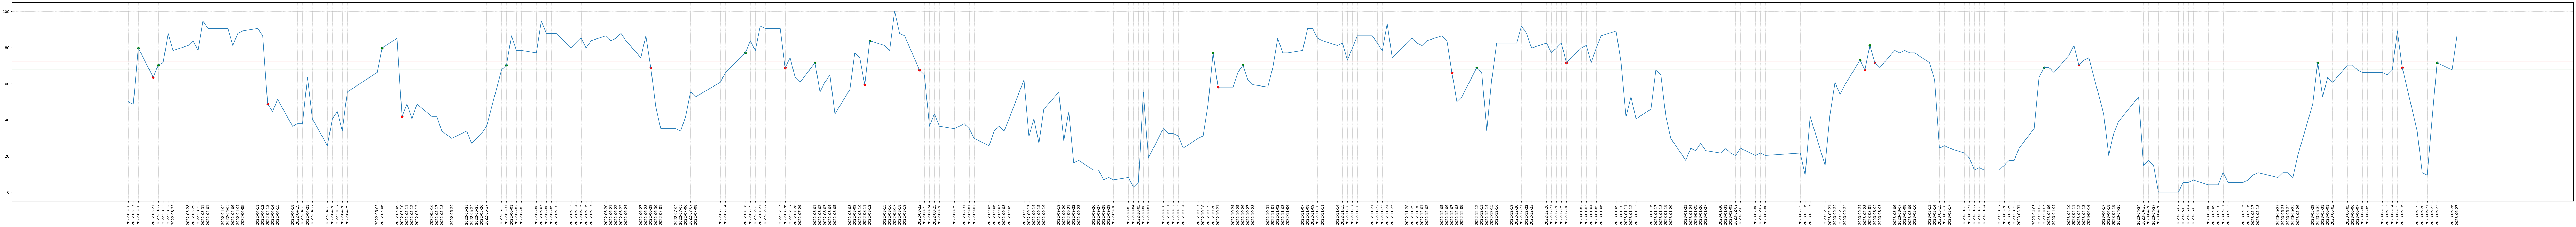

In [ ]:
import matplotlib.pyplot as plt

stock = "ENKAI.IS"

result_df = pd.read_excel("/content/drive/MyDrive/stockmarket/bist30.xlsx")
stock_df = result_df[result_df["STOCK"] == stock].sort_values(by="PROFIT", ascending=False)

buy_threshold = stock_df["BUY TH"].iloc[0]
sell_threshold = stock_df["SELL TH"].iloc[0]
x = stock_df["WEIGHTS"].iloc[0]

data = yf.download(stock, start, end, progress=False)
data = create_indicators(data)
data = score(data, x)

test_df = test_the_market([stock], buy_threshold, sell_threshold, start=start, end=end, balance=balance, today=today, x=x)

plt.figure(figsize=(128,10))

plt.plot(data["Date"], data["SCORE"])
plt.xticks(data["Date"])
plt.xticks(rotation=90)


plt.axhline(y = buy_threshold, color = 'g', linestyle = '-')
plt.axhline(y = sell_threshold, color = 'r', linestyle = '-')

plt.scatter(test_df[test_df["B/S"]== "BUY"]["DATE"], test_df[test_df["B/S"]== "BUY"]["SCORE"], color = 'green')
plt.scatter(test_df[test_df["B/S"]== "SELL"]["DATE"], test_df[test_df["B/S"]== "SELL"]["SCORE"], color = 'red')
plt.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.5)

plt.show()

#Fibonacci

In [ ]:
fibonacci_ratios = [1, 0.786, 0.618, 0.5, 0.382, 0.236, 0]

for ratio in fibonacci_ratios:
  ratio_list = []

  for ticker_symbol in xu100:
    data = yf.download(ticker_symbol, start="2023-01-01", end=end, progress=False)

    high = data["High"].max()
    low = data["Low"].min()

    fibonacci_levels = []

    level = low + ratio * (high - low)
    fibonacci_levels.append(level)

    if data["Close"].iloc[-1] < level:
      ratio_list.append(ticker_symbol)

  print("\nKapanış fiyatı " + str(ratio) + " Fibonacci seviyesinden altta olan hisseler:")
  if len(ratio_list) == 0:
    print("Bu seviyenin altında hisse bulunamadı")
  else:
    print(pd.DataFrame(ratio_list))


Kapanış fiyatı 1 Fibonacci seviyesinden altta olan hisseler:
           0
0   ADESE.IS
1   AGHOL.IS
2   AKBNK.IS
3    AKSA.IS
4   AKSEN.IS
5   ALGYO.IS
6   ALARK.IS
7   ALKIM.IS
8   AEFES.IS
9   ARCLK.IS
10  ARDYZ.IS
11  ASELS.IS
12  AYDEM.IS
13   BERA.IS
14  BIMAS.IS
15  BRISA.IS
16  CCOLA.IS
17  CANTE.IS
18  CEMAS.IS
19  CIMSA.IS
20  DOHOL.IS
21   DOAS.IS
22  EGEEN.IS
23  EKGYO.IS
24  ENJSA.IS
25  ENKAI.IS
26  ERBOS.IS
27  EREGL.IS
28  FROTO.IS
29  GENIL.IS
30  GESAN.IS
31  GLYHO.IS
32  GOZDE.IS
33  GUBRF.IS
34  SAHOL.IS
35  HEKTS.IS
36  INDES.IS
37  IPEKE.IS
38  ISDMR.IS
39  ISFIN.IS
40  ISGYO.IS
41  ISMEN.IS
42  IZMDC.IS
43  KRDMD.IS
44  KARSN.IS
45  KARTN.IS
46  KERVT.IS
47  KRVGD.IS
48  KCHOL.IS
49  KORDS.IS
50  KOZAL.IS
51  KOZAA.IS
52   LOGO.IS
53   MAVI.IS
54  MGROS.IS
55  NTHOL.IS
56   ODAS.IS
57  OTKAR.IS
58  OYAKC.IS
59  PARSN.IS
60  PGSUS.IS
61  PETKM.IS
62  QUAGR.IS
63  RTALB.IS
64  SARKY.IS
65   SASA.IS
66  SELEC.IS
67  SKBNK.IS
68   SOKM.IS
69  TAVHL.IS
70  TKFEN.IS
71

# CONSOLE PROGRAM

In [ ]:
import pandas as pd
import yfinance as yf
import btalib
import numpy as np
import pandas as pd
from ta.trend import PSARIndicator
from ta.momentum import WilliamsRIndicator
from ta.trend import AroonIndicator
from ta.volume import VolumePriceTrendIndicator
from ta.trend import CCIIndicator
from ta.momentum import ROCIndicator
from ta.trend import ADXIndicator
from datetime import datetime, timedelta
from sklearn.preprocessing import MinMaxScaler
import random
import numpy as np
import warnings
import ast
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_rows', 500)

def create_indicators(data):
  # Below 30 is oversold, upper 70 is overbought
  data["RSI"] = btalib.rsi(data["Close"], period=14).df

  #If little period conflicts with the bigger one it means buy else sell.
  data["SMA5"] = btalib.sma(data['Close'], period=5).df
  data["SMA9"] = btalib.sma(data['Close'], period=9).df
  data["SMA10"] = btalib.sma(data['Close'], period=10).df
  data["SMA14"] = btalib.sma(data['Close'], period=14).df
  data["SMA20"] = btalib.sma(data['Close'], period=20).df
  data["SMA21"] = btalib.sma(data['Close'], period=21).df
  data["SMA50"] = btalib.sma(data['Close'], period=50).df
  data["SMA200"] = btalib.sma(data['Close'], period=200).df

  data["EMA5"] = btalib.ema(data['Close'], period=5).df
  data["EMA14"] = btalib.ema(data['Close'], period=14).df
  data["EMA21"] = btalib.ema(data['Close'], period=21).df
  data["EMA50"] = btalib.ema(data['Close'], period=50).df

  #A reading below 20 generally represents an oversold market and a reading above 80 an overbought market. Look only STOCH-D.
  data["STOCH-K"] = btalib.stoch(data['High'], data['Low'], data['Close']).df["k"]
  data["STOCH-D"] = btalib.stoch(data['High'], data['Low'], data['Close']).df["d"]

  #When the MACD line crosses above the signal line, it generates a buy signal. This indicates a potential bullish trend reversal.
  #Additionally, monitor the MACD histogram. When the histogram bars turn positive (change from negative to positive), it confirms the buy signal and suggests increasing buying pressure.
  data["MACD"] = btalib.macd(data['Close']).df["macd"]
  data["SIGNAL"] = btalib.macd(data['Close']).df["signal"]
  data["HISTOGRAM"] = btalib.macd(data['Close']).df["histogram"]

  #Buy Signal: When the price of the stock touches or crosses below the lower Bollinger Band, it can be considered a buy signal.
  #This suggests that the stock may be oversold, and a potential price rebound is expected.
  #Sell Signal: When the price of the stock touches or crosses above the upper Bollinger Band, it can be considered a sell signal.
  #This indicates that the stock may be overbought, and a potential price correction is expected.
  data["BB-UPPER"] = btalib.bbands(data['Close']).df['top']
  data["BB-MID"] = btalib.bbands(data['Close']).df['mid']
  data["BB-LOWER"] = btalib.bbands(data['Close']).df['bot']

  #When the current price of the stock falls below a certain number of standard deviations (GET THE MIN AND MAX VALUE OF THE COLUMN AND MAKE IT THE THRESHOLD)
  #from the mean, it generates a buy signal. This suggests that the price has deviated significantly from the average and may present a buying opportunity.
  data["STDEV"] = data["Close"].rolling(window=10).std()

  #Generate a buy signal when the price crosses above the PSAR.
  #This indicates a potential reversal in the downward trend and suggests a buying opportunity.
  data["PSAR"] = PSARIndicator(data["High"], data["Low"], data["Close"]).psar()

  #Williams
  #Use the Williams Percent Range (%R) formula to calculate the %R values based on historical price data.
  #The %R values range from -100 to 0, where values close to -100 indicate oversold conditions and values close to 0 indicate overbought conditions.
  #Generate a buy signal when the %R value crosses above a certain threshold (e.g., -80) from below.
  #This indicates a potential reversal from oversold conditions and suggests a buying opportunity.
  data["WILLIAMS"] = WilliamsRIndicator(data["High"], data["Low"], data["Close"]).williams_r()

  #The difference between these two lines indicates whether there is overbought (a positive number) or oversold (a negative number).
  data["AROON"] = AroonIndicator(close=data["Close"], window=25).aroon_indicator()

  #obv
  data["OBV"] = VolumePriceTrendIndicator(close=data['Close'], volume=data['Volume']).volume_price_trend()

  #CCI
  data['CCI'] = CCIIndicator(close=data['Close'], low=data["Low"], high=data["High"], window=14).cci()

  #ROC
  data['ROC'] = ROCIndicator(close=data['Close'], window=5).roc()

  #BULLBEARPOWER
  data['BULL'] = data['High'] - (data['High'].rolling(13).max() + data['Low'].rolling(13).min()) / 2
  data['BEAR'] = data['Low'] - (data['High'].rolling(13).max() + data['Low'].rolling(13).min()) / 2

  #ADX
  adx_indicator = ADXIndicator(high=data['High'], low=data['Low'], close=data['Close'], window=14)
  data['ADX'] = adx_indicator.adx()
  data['+DI'] = adx_indicator.adx_pos()
  data['-DI'] = adx_indicator.adx_neg()

  data = data.dropna()
  data = data.reset_index()
  return data

def score(data, x):
  scaler = MinMaxScaler(feature_range=(0, 100))
  scores = []

  x = ast.literal_eval(x)

  for row in range(data.shape[0]):
    score = 0

    if data["RSI"][row] < 30:
      score+=x[0]
    elif data["RSI"][row] > 70:
      score-=x[1]

    if data["RSI"][row] >= 75:
      score+=x[58]
    elif row > 0 and data["RSI"][row-1] > 73 and data["RSI"][row] < 73:
      score-=x[59]

    if row > 0 and data["RSI"].iloc[row-1] > 63 and data["RSI"].iloc[row] < 63:
      score-=x[2]

    if row > 0 and data["RSI"].iloc[row-1] > 49 and data["RSI"].iloc[row] < 49:
      score-=x[3]
    elif row > 0 and data["RSI"].iloc[row-1] < 50 and data["RSI"].iloc[row] > 50:
      score+=x[4]

    if data["SMA5"].iloc[row] > data["SMA10"].iloc[row]:
      score+=x[5]
    else:
      score-=x[6]

    if row > 0 and data['SMA5'].iloc[row-1] < data['SMA10'].iloc[row-1] and data['SMA5'].iloc[row] > data['SMA10'].iloc[row]:
      score+=x[7]
    else:
      score-=x[8]

    if data["SMA9"][row] > data["SMA14"][row]:
      score+=x[9]
    else:
      score-=x[10]

    if row > 0 and data['SMA9'].iloc[row-1] < data['SMA14'].iloc[row-1] and data['SMA9'].iloc[row] > data['SMA14'].iloc[row]:
      score+=x[11]
    else:
      score-=x[12]

    if data["SMA14"][row] > data["SMA21"][row]:
      score+=x[13]
    else:
      score-=x[14]

    if row > 0 and data['SMA14'].iloc[row-1] < data['SMA21'].iloc[row-1] and data['SMA14'].iloc[row] > data['SMA21'].iloc[row]:
      score+=x[15]
    else:
      score-=x[16]

    if row > 1 and data['SMA20'].iloc[row-1] < data["Close"].iloc[row-1] and data['SMA20'].iloc[row] < data["Close"].iloc[row]:
      score+=x[17]
    else:
      score-=x[18]

    if data["SMA21"][row] > data["SMA50"][row]:
      score+=x[19]
    else:
      score-=x[20]

    if row > 0 and data['SMA21'].iloc[row-1] < data['SMA50'].iloc[row-1] and data['SMA21'].iloc[row] > data['SMA50'].iloc[row]:
      score+=x[21]
    else:
      score-=x[22]

    if row > 0 and data['SMA50'].iloc[row-1] < data['SMA200'].iloc[row-1] and data['SMA50'].iloc[row] > data['SMA200'].iloc[row]:
      score+=x[23]

    if data['Close'][row] > data["EMA14"][row]:
      score+=x[24]
    else:
      score-=x[25]

    if data["EMA5"][row] > data["EMA14"][row]:
      score+=x[26]
    else:
      score-=x[27]

    if row > 0 and data['EMA5'].iloc[row-1] < data['EMA14'].iloc[row-1] and data['EMA5'].iloc[row] > data['EMA14'].iloc[row]:
      score+=x[28]
    else:
      score-=x[29]

    if data["EMA14"][row] > data["EMA21"][row]:
      score+=x[30]
    else:
      score-=x[31]

    if row > 0 and data['EMA14'].iloc[row-1] < data['EMA21'].iloc[row-1] and data['EMA14'].iloc[row] > data['EMA21'].iloc[row]:
      score+=x[32]
    else:
      score-=x[33]

    if data["EMA21"][row] > data["EMA50"][row]:
      score+=x[34]
    else:
      score-=x[35]

    if row > 0 and data['EMA21'].iloc[row-1] < data['EMA50'].iloc[row-1] and data['EMA21'].iloc[row] > data['EMA50'].iloc[row]:
      score+=x[36]
    else:
      score-=x[37]

    if data["STOCH-D"][row] <= 20:
      score+=x[38]
    elif data["STOCH-D"][row] >= 80:
      score-=x[39]

    if row > 0 and data["STOCH-D"][row-1] > 65 and data["STOCH-D"][row] < 65:
      score-=x[40]
    elif row > 0 and data["STOCH-D"][row-1] < 35 and data["STOCH-D"][row] > 35:
      score=+x[41]

    if data["MACD"][row] > data["SIGNAL"][row]:
      score+=x[42]
    if row > 0 and data["MACD"][row] > data["SIGNAL"][row] and data["HISTOGRAM"][row-1] < 0 and data["HISTOGRAM"][row] > 0:
      score+=x[43]
    if row > 0 and data["MACD"][row] < data["SIGNAL"][row] and data["HISTOGRAM"][row-1] > 0 and data["HISTOGRAM"][row] < 0:
      score-=x[44]
    if data["MACD"][row] < data["SIGNAL"][row]:
      score-=x[45]

    if data['MACD'].tail(7).mean() > 0:
      score+=x[46]
    else:
      score-=x[47]

    if data['MACD'].tail(30).mean() > 0:
      score+=x[48]
    else:
      score-=x[49]

    if data["BB-LOWER"].iloc[row] > data["Close"].iloc[row]:
        score+=x[50]
    elif data["BB-UPPER"].iloc[row] < data["Close"].iloc[row]:
        score-=x[51]
    if data["BB-MID"].iloc[row] < data["Close"].iloc[row] and data["BB-LOWER"].iloc[row] - data["Close"].iloc[row] < data["BB-MID"].iloc[row] - data["Close"].iloc[row]:
        score+=x[52]
    elif data["BB-MID"].iloc[row] > data["Close"].iloc[row] and data["BB-UPPER"].iloc[row] - data["Close"].iloc[row] < data["BB-MID"].iloc[row] - data["Close"].iloc[row]:
        score-=x[53]

    if (data["STDEV"].max() + data["STDEV"].min()) / 2 > data["STDEV"][row]:
      score+=1
    else:
      score-=1

    if data["PSAR"][row] < data["Close"][row]:
      score+=1
    else:
      score-=1

    if data["WILLIAMS"][row] < -80:
      score+=1
    elif data["WILLIAMS"][row] > -20:
      score-=1

    if data["AROON"][row] > 0:
      score-=1
    else:
      score+=1

    if row > 0 and data["OBV"][row-1] < data["OBV"][row] and data["Close"][row] > data["Close"][row-1]:
      score+=1
    elif row > 0 and data["OBV"][row-1] > data["OBV"][row] and data["Close"][row] < data["Close"][row-1]:
      score-=1

    if row > 0 and (data['CCI'][row] > -100) & (data['CCI'][row-1] <= -100):
      score+=1
    elif row > 0 and (data['CCI'][row] < 100) & (data['CCI'][row-1] >= 100):
      score-=1

    if data["ROC"][row] > 0:
      score+=1
    elif data["ROC"][row] < 0:
      score-=1

    if data["BULL"][row] > 0:
      score+=1
    elif data["BEAR"][row] < 0:
      score-=1

    if (data['ADX'][row] > 25) and (data['+DI'][row] > data['-DI'][row]):
      score+=x[54]
    if data['ADX'][row] > data['+DI'][row] and data['ADX'][row] > data['-DI'][row]:
      score+=x[55]
    if data['ADX'][row] < data['+DI'][row] and data['ADX'][row] < data['-DI'][row]:
      score-=x[56]
    elif (data['ADX'][row] > 40) and (data['+DI'][row] < data['-DI'][row]):
      score-=x[57]

    scores.append(score)

  data["SCORE"] = scores
  data["SCORE"] = scaler.fit_transform(data["SCORE"].values.reshape(-1, 1))
  return data

def buy_or_sell(stock, data, balance, upper_score, lower_score):
  stock_balance = 0
  transactions = []

  for row in range(data.shape[0]):
    if row > 0 and data["SCORE"].iloc[row] >= upper_score and data["SCORE"].iloc[row-1] < upper_score and balance > data["Close"].iloc[row]:
      stock_balance = balance / data["Close"].iloc[row]
      balance-= stock_balance*data["Close"].iloc[row]
      transactions.append([stock, "BUY", data["Date"].iloc[row], data["Close"].iloc[row], stock_balance, balance, data["SCORE"].iloc[row]])

    elif row > 0 and data["SCORE"].iloc[row] <= lower_score and data["SCORE"].iloc[row-1] > lower_score and stock_balance > 1:
      balance+=stock_balance*data["Close"].iloc[row]
      stock_balance-=stock_balance
      transactions.append([stock,"SELL", data["Date"].iloc[row], data["Close"].iloc[row], stock_balance, balance, data["SCORE"].iloc[row]])

  transactions_df = pd.DataFrame(transactions, columns=["STOCK","B/S", "DATE", "PRICE", "STOCK BALANCE", "TRY BALANCE", "SCORE"])
  if transactions_df.empty != True:
    transactions_df["LAST PRICE"] = data["Close"].iloc[-1]
  return transactions_df

def test_the_market(market, buy_threshold, sell_threshold, start, end, balance, today, x):
  test_df = pd.DataFrame()

  for stock in market:
    try:
      data = yf.download(stock, start, end, progress=False)
      data = create_indicators(data)
      data = score(data, x)
      simulation_df = buy_or_sell(stock, data, balance=balance, upper_score=buy_threshold, lower_score=sell_threshold)
      test_df = pd.concat([test_df, simulation_df])

    except:
      print("Data error with stock named: " + stock)

  test_df = test_df.reset_index().drop(["index"], axis=1)
  return_df = pd.DataFrame()

  for stock in market:
    stock_df = test_df[test_df["STOCK"] == stock]

    if stock_df.empty != True:
      if stock_df['B/S'].iloc[-1] == "BUY":
        add = pd.DataFrame({"STOCK": [stock_df["STOCK"].iloc[-1]], "B/S": ["CLOSE"], "DATE": [today], "PRICE": [stock_df["LAST PRICE"].iloc[-1]],
                            'STOCK BALANCE': [0], 'TRY BALANCE': [(stock_df["STOCK BALANCE"].iloc[-1]) * stock_df["LAST PRICE"].iloc[-1]], 'LAST PRICE' :[stock_df["LAST PRICE"].iloc[-1]]})

        stock_df = stock_df.append(add)
        return_df = pd.concat([return_df, stock_df], ignore_index=True)
      else:
        return_df = pd.concat([return_df, stock_df], ignore_index=True)

  return return_df

xu100 = ['ADESE.IS',
        'AGHOL.IS',
        'AKBNK.IS',
        'AKSA.IS',
        'AKSEN.IS',
        'ALGYO.IS',
        'ALARK.IS',
        'ALKIM.IS',
        'AEFES.IS',
        'ARCLK.IS',
        'ARDYZ.IS',
        'ASELS.IS',
        'AYDEM.IS',
        'BERA.IS',
        'BIMAS.IS',
        'BRYAT.IS',
        'BRISA.IS',
        'CCOLA.IS',
        'CANTE.IS',
        'CEMAS.IS',
        'CIMSA.IS',
        'DOHOL.IS',
        'DOAS.IS',
        'EGEEN.IS',
        'ECILC.IS',
        'EKGYO.IS',
        'ENJSA.IS',
        'ENKAI.IS',
        'ERBOS.IS',
        'EREGL.IS',
        'FROTO.IS',
        'GENIL.IS',
        'GESAN.IS',
        'GLYHO.IS',
        'GOZDE.IS',
        'GUBRF.IS',
        'SAHOL.IS',
        'HEKTS.IS',
        'INDES.IS',
        'IPEKE.IS',
        'ISDMR.IS',
        'ISFIN.IS',
        'ISGYO.IS',
        'ISMEN.IS',
        'IZMDC.IS',
        'KRDMD.IS',
        'KARSN.IS',
        'KARTN.IS',
        'KERVT.IS',
        'KRVGD.IS',
        'KCHOL.IS',
        'KORDS.IS',
        'KOZAL.IS',
        'KOZAA.IS',
        'LOGO.IS',
        'MAVI.IS',
        'MGROS.IS',
        'NTHOL.IS',
        'ODAS.IS',
        'OTKAR.IS',
        'OYAKC.IS',
        'PARSN.IS',
        'PGSUS.IS',
        'PETKM.IS',
        'QUAGR.IS',
        'RTALB.IS',
        'SARKY.IS',
        'SASA.IS',
        'SELEC.IS',
        'SKBNK.IS',
        'SOKM.IS',
        'TAVHL.IS',
        'TKFEN.IS',
        'TKNSA.IS',
        'TOASO.IS',
        'TRGYO.IS',
        'TCELL.IS',
        'TUPRS.IS',
        'THYAO.IS',
        'TTKOM.IS',
        'TTRAK.IS',
        'GARAN.IS',
        'HALKB.IS',
        'ISCTR.IS',
        'TSKB.IS',
        'TURSG.IS',
        'SISE.IS',
        'VAKBN.IS',
        'ULKER.IS',
        'VERUS.IS',
        'VESBE.IS',
        'VESTL.IS',
        'YKBNK.IS',
        'YATAS.IS',
        'ZRGYO.IS',
        'ZOREN.IS']

xu030 = [
        "RTALB.IS",
        'VAKBN.IS',
        'AKBNK.IS',
        'AKSEN.IS',
        'ALARK.IS',
        'ARCLK.IS',
        'ASELS.IS',
        'BIMAS.IS',
        'EKGYO.IS',
        'ENKAI.IS',
        'EREGL.IS',
        'FROTO.IS',
        'GARAN.IS',
        'GUBRF.IS',
        'HEKTS.IS',
        'KRDMD.IS',
        'KCHOL.IS',
        'KOZAL.IS',
        'KOZAA.IS',
        'ODAS.IS',
        'PGSUS.IS',
        'SAHOL.IS',
        'SASA.IS',
        'PETKM.IS',
        'SISE.IS',
        'TAVHL.IS',
        'THYAO.IS',
        'TUPRS.IS',
        'TOASO.IS',
        'TCELL.IS',
        'ISCTR.IS',
        'YKBNK.IS'
          ]

xutum = ['AVOD.IS',
 'A1CAP.IS',
 'ACSEL.IS',
 'ADEL.IS',
 'ADESE.IS',
 'AFYON.IS',
 'AGHOL.IS',
 'AGESA.IS',
 'AHGAZ.IS',
 'AKSFA.IS',
 'AKFK.IS',
 'AKMEN.IS',
 'AKBNK.IS',
 'AKCNS.IS',
 'AKDFA.IS',
 'AKYHO.IS',
 'AKENR.IS',
 'AKFGY.IS',
 'AKFEN.IS',
 'AKFYE.IS',
 'ATEKS.IS',
 'AKSGY.IS',
 'AKMGY.IS',
 'AKSA.IS',
 'AKSEN.IS',
 'AKGRT.IS',
 'AKSUE.IS',
 'AKTVK.IS',
 'AKTIF.IS',
 'ALCAR.IS',
 'ALGYO.IS',
 'ALARK.IS',
 'ALBRK.IS',
 'ALCTL.IS',
 'ALFAS.IS',
 'ALJF.IS',
 'ALKIM.IS',
 'ALKA.IS',
 'ALNTF.IS',
 'AYCES.IS',
 'ALMAD.IS',
 'ANSGR.IS',
 'AEFES.IS',
 'ANHYT.IS',
 'ASUZU.IS',
 'ANGEN.IS',
 'ANELE.IS',
 'ARCLK.IS',
 'ARDYZ.IS',
 'ARENA.IS',
 'ARNFK.IS',
 'ARSAN.IS',
 'ARZUM.IS',
 'ASELS.IS',
 'ASTOR.IS',
 'ATAGY.IS',
 'ATAYM.IS',
 'AGYO.IS',
 'ATLFA.IS',
 'ATSYH.IS',
 'ATLAS.IS',
 'ATATP.IS',
 'AVGYO.IS',
 'AVTUR.IS',
 'AVHOL.IS',
 'AYDEM.IS',
 'AYEN.IS',
 'AYES.IS',
 'AYGAZ.IS',
 'AZTEK.IS',
 'BAGFS.IS',
 'BAKAB.IS',
 'BALAT.IS',
 'BNTAS.IS',
 'BANVT.IS',
 'BARMA.IS',
 'BASGZ.IS',
 'BASCM.IS',
 'BTCIM.IS',
 'BSOKE.IS',
 'BAYRK.IS',
 'BERA.IS',
 'BRKT.IS',
 'BRKSN.IS',
 'BJKAS.IS',
 'BEYAZ.IS',
 'BIENY.IS',
 'BLCYT.IS',
 'BLKOM.IS',
 'BIMAS.IS',
 'BIOEN.IS',
 'BRKVY.IS',
 'BRKO.IS',
 'BRLSM.IS',
 'BRMEN.IS',
 'BIZIM.IS',
 'BMSTL.IS',
 'BMSCH.IS',
 'BNPPI.IS',
 'BNPFK.IS',
 'BOBET.IS',
 'BRSAN.IS',
 'BRYAT.IS',
 'BFREN.IS',
 'BOSSA.IS',
 'BRISA.IS',
 'BURCE.IS',
 'BURVA.IS',
 'BUCIM.IS',
 'BVSAN.IS',
 'BIGCH.IS',
 'CRFSA.IS',
 'CASA.IS',
 'CEOEM.IS',
 'CREAN.IS',
 'CCOLA.IS',
 'CONSE.IS',
 'COSMO.IS',
 'CRDFA.IS',
 'CVKMD.IS',
 'CWENE.IS',
 'CAGFA.IS',
 'CLDNM.IS',
 'CLKEN.IS',
 'CANTE.IS',
 'CLEBI.IS',
 'CELHA.IS',
 'CEMAS.IS',
 'CEMTS.IS',
 'CMBTN.IS',
 'CMENT.IS',
 'CIMSA.IS',
 'CUSAN.IS',
 'DYBNK.IS',
 'DAGI.IS',
 'DAGHL.IS',
 'DAPGM.IS',
 'DARDL.IS',
 'DGATE.IS',
 'DGRVK.IS',
 'DMSAS.IS',
 'DENGE.IS',
 'DENFA.IS',
 'DNFIN.IS',
 'DZGYO.IS',
 'DZYMK.IS',
 'DENIZ.IS',
 'DERIM.IS',
 'DERHL.IS',
 'DESA.IS',
 'DESPC.IS',
 'DTYGD.IS',
 'DEVA.IS',
 'DNISI.IS',
 'DIRIT.IS',
 'DITAS.IS',
 'DOCO.IS',
 'DOBUR.IS',
 'DDTCR.IS',
 'DOHOL.IS',
 'DTRND.IS',
 'DGNMO.IS',
 'ARASE.IS',
 'DOGUB.IS',
 'DGGYO.IS',
 'DOAS.IS',
 'DFKTR.IS',
 'DOKTA.IS',
 'DURDO.IS',
 'DNYVA.IS',
 'DYOBY.IS',
 'EDATA.IS',
 'ECZYT.IS',
 'EDIP.IS',
 'EGEEN.IS',
 'EGGUB.IS',
 'EGPRO.IS',
 'EGSER.IS',
 'EPLAS.IS',
 'ECILC.IS',
 'EKIZ.IS',
 'EKOFA.IS',
 'EKSUN.IS',
 'ELITE.IS',
 'EMKEL.IS',
 'EMNIS.IS',
 'EMIRV.IS',
 'EKTVK.IS',
 'EKGYO.IS',
 'EMVAR.IS',
 'ENJSA.IS',
 'ENKAI.IS',
 'ENSRI.IS',
 'ERBOS.IS',
 'ERCB.IS',
 'EREGL.IS',
 'ERGLI.IS',
 'KIMMR.IS',
 'ERSU.IS',
 'ESCAR.IS',
 'ESCOM.IS',
 'ESEN.IS',
 'ETILR.IS',
 'EUKYO.IS',
 'EUYO.IS',
 'ETYAT.IS',
 'EUHOL.IS',
 'TEZOL.IS',
 'EUREN.IS',
 'EUPWR.IS',
 'EYGYO.IS',
 'FADE.IS',
 'FSDAT.IS',
 'FMIZP.IS',
 'FENER.IS',
 'FIBAF.IS',
 'FBBNK.IS',
 'FLAP.IS',
 'FONET.IS',
 'FROTO.IS',
 'FORMT.IS',
 'FORTE.IS',
 'FRIGO.IS',
 'GWIND.IS',
 'GSRAY.IS',
 'GAPIN.IS',
 'GARFA.IS',
 'GARFL.IS',
 'GRFIN.IS',
 'GRNYO.IS',
 'GEDIK.IS',
 'GEDZA.IS',
 'GLCVY.IS',
 'GENIL.IS',
 'GENTS.IS',
 'GEREL.IS',
 'GZNMI.IS',
 'GMTAS.IS',
 'GESAN.IS',
 'GLBMD.IS',
 'GLYHO.IS',
 'GGBVK.IS',
 'GSIPD.IS',
 'GOODY.IS',
 'GOKNR.IS',
 'GOLTS.IS',
 'GOZDE.IS',
 'GRTRK.IS',
 'GSDDE.IS',
 'GSDHO.IS',
 'GUBRF.IS',
 'GLRYH.IS',
 'GRSEL.IS',
 'SAHOL.IS',
 'HALKF.IS',
 'HLGYO.IS',
 'HLVKS.IS',
 'HALKI.IS',
 'HATEK.IS',
 'HDFFL.IS',
 'HDFGS.IS',
 'HEDEF.IS',
 'HEKTS.IS',
 'HKTM.IS',
 'HTTBT.IS',
 'HUBVC.IS',
 'HUNER.IS',
 'HUZFA.IS',
 'HURGZ.IS',
 'ICBCT.IS',
 'RHEAG.IS',
 'INGBN.IS',
 'INGRM.IS',
 'INVEO.IS',
 'INVES.IS',
 'ISKPL.IS',
 'IEYHO.IS',
 'IDEAS.IS',
 'IDGYO.IS',
 'IHEVA.IS',
 'IHLGM.IS',
 'IHGZT.IS',
 'IHAAS.IS',
 'IHLAS.IS',
 'IHYAY.IS',
 'IMASM.IS',
 'INALR.IS',
 'INDES.IS',
 'INFO.IS',
 'INTEM.IS',
 'IPEKE.IS',
 'ISDMR.IS',
 'ISFAK.IS',
 'ISFIN.IS',
 'ISGYO.IS',
 'ISGSY.IS',
 'ISMEN.IS',
 'ISYAT.IS',
 'ISBIR.IS',
 'ISSEN.IS',
 'ITTFH.IS',
 'IZINV.IS',
 'IZMDC.IS',
 'IZFAS.IS',
 'JANTS.IS',
 'KFEIN.IS',
 'KLKIM.IS',
 'KLVKS.IS',
 'KAPLM.IS',
 'KRDMA.IS',
 'KRDMB.IS',
 'KRDMD.IS',
 'KAREL.IS',
 'KARSN.IS',
 'KRTEK.IS',
 'KARYE.IS',
 'KARTN.IS',
 'KATVK.IS',
 'KTLEV.IS',
 'KATMR.IS',
 'KAYSE.IS',
 'KNTFA.IS',
 'KENT.IS',
 'KERVT.IS',
 'KRVGD.IS',
 'KERVN.IS',
 'KZBGY.IS',
 'KLGYO.IS',
 'KLRHO.IS',
 'KMPUR.IS',
 'KLMSN.IS',
 'KCAER.IS',
 'KFKTF.IS',
 'KOCFN.IS',
 'KCHOL.IS',
 'KLSYN.IS',
 'KNFRT.IS',
 'KONTR.IS',
 'KONYA.IS',
 'KONKA.IS',
 'KGYO.IS',
 'KORDS.IS',
 'KRPLS.IS',
 'KORTS.IS',
 'KOZAL.IS',
 'KOZAA.IS',
 'KOPOL.IS',
 'KRGYO.IS',
 'KRSTL.IS',
 'KRONT.IS',
 'KTKVK.IS',
 'KSTUR.IS',
 'KUVVA.IS',
 'KUYAS.IS',
 'KUTPO.IS',
 'KTSKR.IS',
 'LIDER.IS',
 'LIDFA.IS',
 'LINK.IS',
 'LOGO.IS',
 'LKMNH.IS',
 'LUKSK.IS',
 'MACKO.IS',
 'MAKIM.IS',
 'MAKTK.IS',
 'MANAS.IS',
 'MRBAS.IS',
 'MAGEN.IS',
 'MRMAG.IS',
 'MARKA.IS',
 'MAALT.IS',
 'MRSHL.IS',
 'MRGYO.IS',
 'MARTI.IS',
 'MTRKS.IS',
 'MAVI.IS',
 'MZHLD.IS',
 'MEDTR.IS',
 'MEGAP.IS',
 'MEKMD.IS',
 'MNDRS.IS',
 'MEPET.IS',
 'MERCN.IS',
 'MRBKF.IS',
 'MBFTR.IS',
 'MERIT.IS',
 'MERKO.IS',
 'METUR.IS',
 'METRO.IS',
 'MTRYO.IS',
 'MIATK.IS',
 'MGROS.IS',
 'MIPAZ.IS',
 'MSGYO.IS',
 'MPARK.IS',
 'MMCAS.IS',
 'MOBTL.IS',
 'MNDTR.IS',
 'EGEPO.IS',
 'NATEN.IS',
 'NTGAZ.IS',
 'NTHOL.IS',
 'NETAS.IS',
 'NIBAS.IS',
 'NUHCM.IS',
 'NUGYO.IS',
 'NRHOL.IS',
 'NRLIN.IS',
 'NURVK.IS',
 'NRBNK.IS',
 'OBASE.IS',
 'ODAS.IS',
 'ODEA.IS',
 'ONCSM.IS',
 'OPET.IS',
 'ORCAY.IS',
 'ORFIN.IS',
 'ORGE.IS',
 'ORMA.IS',
 'OSMEN.IS',
 'OSTIM.IS',
 'OTKAR.IS',
 'OTOKC.IS',
 'OTTO.IS',
 'OYAKC.IS',
 'OYYAT.IS',
 'OYAYO.IS',
 'OYLUM.IS',
 'OZKGY.IS',
 'OZGYO.IS',
 'OZRDN.IS',
 'OZSUB.IS',
 'PALEN.IS',
 'PAMEL.IS',
 'PNLSN.IS',
 'PAGYO.IS',
 'PAPIL.IS',
 'PRDGS.IS',
 'PRKME.IS',
 'PARSN.IS',
 'PBTR.IS',
 'PASEU.IS',
 'PSGYO.IS',
 'PCILT.IS',
 'PGSUS.IS',
 'PEKGY.IS',
 'PENGD.IS',
 'PENTA.IS',
 'PEGYO.IS',
 'PSDTC.IS',
 'PETKM.IS',
 'PKENT.IS',
 'PHLLP.IS',
 'PETUN.IS',
 'PINSU.IS',
 'PNSUT.IS',
 'PKART.IS',
 'PLTUR.IS',
 'POLHO.IS',
 'POLTK.IS',
 'PRZMA.IS',
 'QYHOL.IS',
 'QNBFF.IS',
 'QNBFL.IS',
 'QNBVK.IS',
 'QNBFI.IS',
 'QNBFB.IS',
 'QUAGR.IS',
 'RNPOL.IS',
 'RALYH.IS',
 'RAYSG.IS',
 'RYGYO.IS',
 'RYSAS.IS',
 'RODRG.IS',
 'ROYAL.IS',
 'RTALB.IS',
 'RUBNS.IS',
 'SAFKR.IS',
 'SANEL.IS',
 'SNICA.IS',
 'SANFM.IS',
 'SANKO.IS',
 'SAMAT.IS',
 'SARKY.IS',
 'SARTN.IS',
 'SASA.IS',
 'SAYAS.IS',
 'SDTTR.IS',
 'SEKUR.IS',
 'SELEC.IS',
 'SELGD.IS',
 'SELVA.IS',
 'SNKRN.IS',
 'SRVGY.IS',
 'SEYKM.IS',
 'SHTRP.IS',
 'SILVR.IS',
 'SNGYO.IS',
 'SMRTG.IS',
 'SMART.IS',
 'SODSN.IS',
 'SOKE.IS',
 'SKTAS.IS',
 'SONME.IS',
 'SNPAM.IS',
 'SUMAS.IS',
 'SUNTK.IS',
 'SUWEN.IS',
 'SZUKI.IS',
 'SMRFA.IS',
 'SMRVA.IS',
 'SEKFA.IS',
 'SEKFK.IS',
 'SEGYO.IS',
 'SKYMD.IS',
 'SKBNK.IS',
 'SOKM.IS',
 'DRPHN.IS',
 'TOKI.IS',
 'TCRYT.IS',
 'TAMFA.IS',
 'TNZTP.IS',
 'TATGD.IS',
 'TAVHL.IS',
 'TEBFA.IS',
 'TEBCE.IS',
 'TEBYT.IS',
 'TEKTU.IS',
 'TKFEN.IS',
 'TKNSA.IS',
 'TMPOL.IS',
 'TERA.IS',
 'TETMT.IS',
 'TFNVK.IS',
 'TGSAS.IS',
 'TOASO.IS',
 'TRGYO.IS',
 'TLMAN.IS',
 'TSPOR.IS',
 'TDGYO.IS',
 'ISKMD.IS',
 'TSGYO.IS',
 'TUCLK.IS',
 'TUKAS.IS',
 'TRCAS.IS',
 'TUREX.IS',
 'TRILC.IS',
 'FNCLL.IS',
 'TCELL.IS',
 'TRKSH.IS',
 'TKYAT.IS',
 'TMSN.IS',
 'TUPRS.IS',
 'THYAO.IS',
 'PRKAB.IS',
 'TTKOM.IS',
 'TTRAK.IS',
 'TBORG.IS',
 'TURGG.IS',
 'GARAN.IS',
 'HALKB.IS',
 'EXIMB.IS',
 'ISATR,.IS',
 'ISBTR.IS',
 'ISCTR.IS',
 'ISKUR.IS',
 'KLNMA.IS',
 'TSKB.IS',
 'TURSG.IS',
 'SISE.IS',
 'VAKBN.IS',
 'UFUK.IS',
 'ULAS.IS',
 'ULUFA.IS',
 'ULUSE.IS',
 'ULUUN.IS',
 'UMPAS.IS',
 'USAK.IS',
 'UZERB.IS',
 'ULKER.IS',
 'UNLUS.IS',
 'UNLU.IS',
 'VAKFA.IS',
 'VAKFN.IS',
 'VKGYO.IS',
 'VKFYO.IS',
 'VAKVK.IS',
 'VAKKO.IS',
 'VANGD.IS',
 'VBTYZ.IS',
 'VDFLO.IS',
 'VERUS.IS',
 'VERTU.IS',
 'VESBE.IS',
 'VESTL.IS',
 'VKING.IS',
 'VDFAS.IS',
 'YKFKT.IS',
 'YKFIN.IS',
 'YKYAT.IS',
 'YKBNK.IS',
 'YAPRK.IS',
 'YATAS.IS',
 'YFMEN.IS',
 'YATVK.IS',
 'YYLGD.IS',
 'YAYLA.IS',
 'YGGYO.IS',
 'YEOTK.IS',
 'YGYO.IS',
 'YYAPI.IS',
 'YESIL.IS',
 'YBTAS.IS',
 'YONGA.IS',
 'YKSLN.IS',
 'YUNSA.IS',
 'ZEDUR.IS',
 'ZRGYO.IS',
 'ZKBVK.IS',
 'ZOREN.IS',
 'ZORLF.IS'
 ]

result_df = pd.read_excel("bist30.xlsx")

today = datetime.today().date()
tomorrow = today + timedelta(days=1)
start="2021-06-01"
end = tomorrow.strftime("%Y-%m-%d")
balance = 2000

print(f"Tüm veriler için başlangıç tarihi {start} ve bitiş tarihi {end}'dir.")

print("\nLütfen aşağıdaki seçeneklerden birine ait numarayı girin. \n\n1. AL durumda olan hisseleri görmek için (XU030) \n2. SAT durumda olan hisseleri görmek için (XU030)\n3. Hisse adı girerek geçmiş işlemleri görmek için (XU030)\n4. Fibonacci seviyelerinin altında olan hisseleri görmek için (XUTUM)\n5. Hisse adı girerek hisseye ait skor, AL-SAT grafiğini görmek için (XU030)")
while True:
  user_input = input("\nYukarıdaki seçeneklerden birine ait numarayı girin: ")

  if user_input == "1":
    print("AL durumunda olan hisseler listeleniyor...")
    print("\n")

    buy_stocks = []

    for stock in xu030:
      stock_df = result_df[result_df["STOCK"] == stock].sort_values(by="PROFIT", ascending=False)
      buy_threshold = stock_df["BUY TH"].iloc[0]
      sell_threshold = stock_df["SELL TH"].iloc[0]
      x = stock_df["WEIGHTS"].iloc[0]

      data = yf.download(stock, start=start, end=end, progress=False)
      data = create_indicators(data)
      data = score(data, x)

      if data["SCORE"].iloc[-1] > buy_threshold and data["SCORE"].iloc[-2] < buy_threshold:
        buy_stocks.append([data.tail(1)["Date"].item(), stock, data.tail(1)["Close"].item(), data.tail(1)["SCORE"].item(), "BUY"])


    print(pd.DataFrame(buy_stocks, columns=["DATE", "STOCK", "PRICE", "SCORE", "BUY OR SELL"]))
  elif user_input == "2":
    print("Sat durumunda olan hisseler listeleniyor...")
    print("\n")

    sell_stocks = []

    for stock in xu030:
      stock_df = result_df[result_df["STOCK"] == stock].sort_values(by="PROFIT", ascending=False)
      buy_threshold = stock_df["BUY TH"].iloc[0]
      sell_threshold = stock_df["SELL TH"].iloc[0]
      x = stock_df["WEIGHTS"].iloc[0]

      try:
        data = yf.download(stock, start=start, end=end, progress=False)
        data = create_indicators(data)
        data = score(data, x)

        if data["SCORE"].iloc[-1] < sell_threshold and data["SCORE"].iloc[-2] > sell_threshold:
          sell_stocks.append([data.tail(1)["Date"].item(), stock, data.tail(1)["Close"].item(), data.tail(1)["SCORE"].item(), "SELL"])

      except:
        print("Data error at the stock named: " + stock)

    print(pd.DataFrame(sell_stocks, columns=["DATE", "STOCK", "PRICE", "SCORE", "BUY OR SELL"]))

  elif user_input == "3":
    print("Geçmiş alım satımlarını görmek istediğiniz hisseyi girin.")
    stock_input = input("Hisse adı: ").upper()

    profit_or_loss = []
    transactions_df = pd.DataFrame()

    for stock in xu030:
      stock_df = result_df[result_df["STOCK"] == stock].sort_values(by="PROFIT", ascending=False)

      buy_threshold = stock_df["BUY TH"].iloc[0]
      sell_threshold = stock_df["SELL TH"].iloc[0]
      x = stock_df["WEIGHTS"].iloc[0]

      test_df = test_the_market([stock], buy_threshold, sell_threshold, start=start, end=end, balance=balance, today=today, x=x)
      transactions_df = pd.concat([transactions_df, test_df], ignore_index=True)

      for stock in [stock]:
        stock_df = test_df[test_df["STOCK"] == stock]

        if stock_df.empty != True:
          profit_or_loss.append([stock_df["STOCK"].iloc[-1] ,stock_df['TRY BALANCE'].tail(1).item() - balance])

      profit_df = pd.DataFrame(profit_or_loss)

    print(transactions_df[transactions_df["STOCK"] == stock_input+".IS"])

  elif user_input == "4":
    print("Fibonacci seviyeleri bulunuyor..")

    fibonacci_ratios = [1, 0.786, 0.618, 0.5, 0.382, 0.236, 0]

    xu100_df = pd.DataFrame()

    for ticker_symbol in xu100:
      try:
        data = yf.download(ticker_symbol, start="2023-01-01", end="2023-06-29", progress=False)
        data["STOCK"] = ticker_symbol
        xu100_df = pd.concat([xu100_df, data], ignore_index=True)
      except:
        print(f"{ticker_symbol} için veri indirilemedi.")

    for ratio in fibonacci_ratios:
      ratio_list = []

      for ticker_symbol in xutum:
        try:
          data = xu100_df[xu100_df["STOCK"] == ticker_symbol]

          high = data["High"].max()
          low = data["Low"].min()

          fibonacci_levels = []

          level = low + ratio * (high - low)
          fibonacci_levels.append(level)

          if data["Close"].iloc[-1] < level:
              ratio_list.append(ticker_symbol)
        except:
          pass

      print("\nKapanış fiyatı " + str(ratio) + " Fibonacci seviyesinden altta olan hisseler:")
      if len(ratio_list) == 0:
        print("Bu seviyenin altında hisse bulunamadı")
      else:
        print(pd.DataFrame(ratio_list))

  elif user_input == "5":
    stock = input("Hisse adı: ").upper()
    stock = stock + ".IS"

    stock_df = result_df[result_df["STOCK"] == stock].sort_values(by="PROFIT", ascending=False)

    buy_threshold = stock_df["BUY TH"].iloc[0]
    sell_threshold = stock_df["SELL TH"].iloc[0]
    x = stock_df["WEIGHTS"].iloc[0]

    data = yf.download(stock, start, end, progress=False)
    data = create_indicators(data)
    data = score(data, x)

    test_df = test_the_market([stock], buy_threshold, sell_threshold, start=start, end=end, balance=balance, today=today, x=x)

    plt.figure(figsize=(128,10))

    plt.plot(data["Date"], data["SCORE"])
    plt.xticks(data["Date"])
    plt.xticks(rotation=90)


    plt.axhline(y = buy_threshold, color = 'g', linestyle = '-')
    plt.axhline(y = sell_threshold, color = 'r', linestyle = '-')

    plt.scatter(test_df[test_df["B/S"]== "BUY"]["DATE"], test_df[test_df["B/S"]== "BUY"]["SCORE"], color = 'green')
    plt.scatter(test_df[test_df["B/S"]== "SELL"]["DATE"], test_df[test_df["B/S"]== "SELL"]["SCORE"], color = 'red')
    plt.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.5)

    plt.show()

  elif user_input == "Ç":
    break
  else:
    print("\nLütfen aşağıdaki seçeneklerden birine ait numarayı girin. \n\n1. AL durumda olan hisseleri görmek için (XU030) \n2. SAT durumda olan hisseleri görmek için (XU030)\n3. Hisse adı girerek geçmiş işlemleri görmek için (XU030)\n4. Fibonacci seviyelerinin altında olan hisseleri görmek için (XUTUM)\n5. Hisse adı girerek hisseye ait skor, AL-SAT grafiğini görmek için (XU030)")

#GOOGLE

Tüm veriler için başlangıç tarihi 2021-06-01 ve bitiş tarihi 2023-07-05'dir.

Lütfen aşağıdaki seçeneklerden birine ait numarayı girin. 

1. AL durumda olan hisseleri görmek için (XU030) 
2. SAT durumda olan hisseleri görmek için (XU030)
3. Hisse adı girerek geçmiş işlemleri görmek için (XU030)
4. Fibonacci seviyelerinin altında olan hisseleri görmek için (XUTUM)
5. Hisse adı girerek hisseye ait skor, AL-SAT grafiğini görmek için (XU030)

Yukarıdaki seçeneklerden birine ait numarayı girin: 1
AL durumunda olan hisseler listeleniyor...


        DATE     STOCK  PRICE  SCORE BUY OR SELL
0 2023-07-04  ALARK.IS  80.00  74.29         BUY
1 2023-07-04  SAHOL.IS  47.10  62.71         BUY
2 2023-07-04  ASUZU.IS 198.80  70.77         BUY
3 2023-07-04  DESPC.IS  22.00  75.00         BUY

Yukarıdaki seçeneklerden birine ait numarayı girin: 2
Sat durumunda olan hisseler listeleniyor...


         DATE     STOCK   PRICE  SCORE BUY OR SELL
0  2023-07-04  BIMAS.IS  176.40  62.07        SELL
1  2023-07

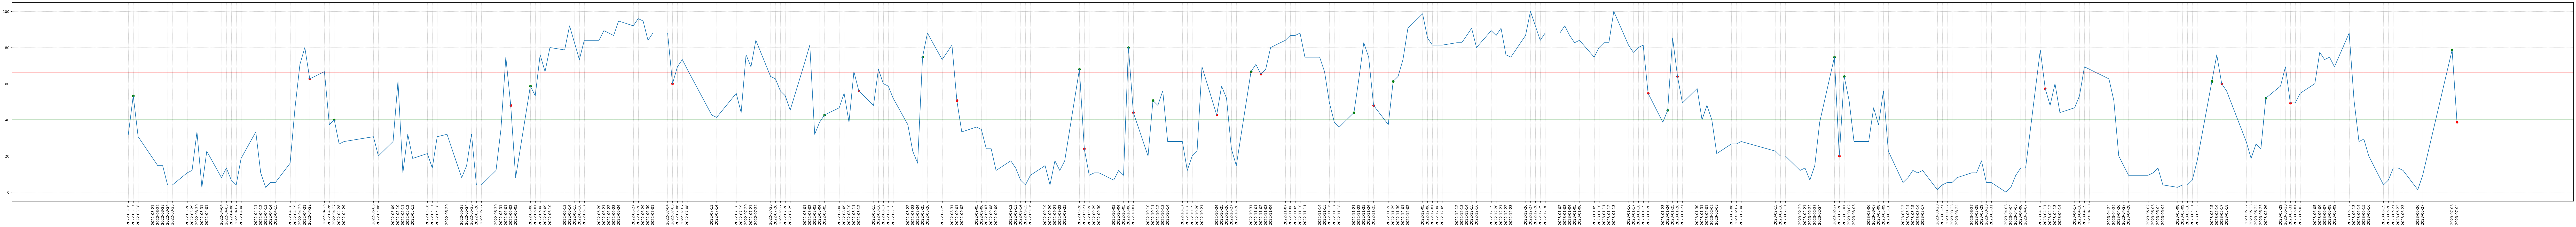

KeyboardInterrupt: ignored

In [41]:
import pandas as pd
import yfinance as yf
import btalib
import numpy as np
import pandas as pd
from ta.trend import PSARIndicator
from ta.momentum import WilliamsRIndicator
from ta.trend import AroonIndicator
from ta.volume import VolumePriceTrendIndicator
from ta.trend import CCIIndicator
from ta.momentum import ROCIndicator
from ta.trend import ADXIndicator
from datetime import datetime, timedelta
from sklearn.preprocessing import MinMaxScaler
import random
import numpy as np
import warnings
import ast
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_rows', 500)

def create_indicators(data):
  # Below 30 is oversold, upper 70 is overbought
  data["RSI"] = btalib.rsi(data["Close"], period=14).df

  #If little period conflicts with the bigger one it means buy else sell.
  data["SMA5"] = btalib.sma(data['Close'], period=5).df
  data["SMA9"] = btalib.sma(data['Close'], period=9).df
  data["SMA10"] = btalib.sma(data['Close'], period=10).df
  data["SMA14"] = btalib.sma(data['Close'], period=14).df
  data["SMA20"] = btalib.sma(data['Close'], period=20).df
  data["SMA21"] = btalib.sma(data['Close'], period=21).df
  data["SMA50"] = btalib.sma(data['Close'], period=50).df
  data["SMA200"] = btalib.sma(data['Close'], period=200).df

  data["EMA5"] = btalib.ema(data['Close'], period=5).df
  data["EMA14"] = btalib.ema(data['Close'], period=14).df
  data["EMA21"] = btalib.ema(data['Close'], period=21).df
  data["EMA50"] = btalib.ema(data['Close'], period=50).df

  #A reading below 20 generally represents an oversold market and a reading above 80 an overbought market. Look only STOCH-D.
  data["STOCH-K"] = btalib.stoch(data['High'], data['Low'], data['Close']).df["k"]
  data["STOCH-D"] = btalib.stoch(data['High'], data['Low'], data['Close']).df["d"]

  #When the MACD line crosses above the signal line, it generates a buy signal. This indicates a potential bullish trend reversal.
  #Additionally, monitor the MACD histogram. When the histogram bars turn positive (change from negative to positive), it confirms the buy signal and suggests increasing buying pressure.
  data["MACD"] = btalib.macd(data['Close']).df["macd"]
  data["SIGNAL"] = btalib.macd(data['Close']).df["signal"]
  data["HISTOGRAM"] = btalib.macd(data['Close']).df["histogram"]

  #Buy Signal: When the price of the stock touches or crosses below the lower Bollinger Band, it can be considered a buy signal.
  #This suggests that the stock may be oversold, and a potential price rebound is expected.
  #Sell Signal: When the price of the stock touches or crosses above the upper Bollinger Band, it can be considered a sell signal.
  #This indicates that the stock may be overbought, and a potential price correction is expected.
  data["BB-UPPER"] = btalib.bbands(data['Close']).df['top']
  data["BB-MID"] = btalib.bbands(data['Close']).df['mid']
  data["BB-LOWER"] = btalib.bbands(data['Close']).df['bot']

  #When the current price of the stock falls below a certain number of standard deviations (GET THE MIN AND MAX VALUE OF THE COLUMN AND MAKE IT THE THRESHOLD)
  #from the mean, it generates a buy signal. This suggests that the price has deviated significantly from the average and may present a buying opportunity.
  data["STDEV"] = data["Close"].rolling(window=10).std()

  #Generate a buy signal when the price crosses above the PSAR.
  #This indicates a potential reversal in the downward trend and suggests a buying opportunity.
  data["PSAR"] = PSARIndicator(data["High"], data["Low"], data["Close"]).psar()

  #Williams
  #Use the Williams Percent Range (%R) formula to calculate the %R values based on historical price data.
  #The %R values range from -100 to 0, where values close to -100 indicate oversold conditions and values close to 0 indicate overbought conditions.
  #Generate a buy signal when the %R value crosses above a certain threshold (e.g., -80) from below.
  #This indicates a potential reversal from oversold conditions and suggests a buying opportunity.
  data["WILLIAMS"] = WilliamsRIndicator(data["High"], data["Low"], data["Close"]).williams_r()

  #The difference between these two lines indicates whether there is overbought (a positive number) or oversold (a negative number).
  data["AROON"] = AroonIndicator(close=data["Close"], window=25).aroon_indicator()

  #obv
  data["OBV"] = VolumePriceTrendIndicator(close=data['Close'], volume=data['Volume']).volume_price_trend()

  #CCI
  data['CCI'] = CCIIndicator(close=data['Close'], low=data["Low"], high=data["High"], window=14).cci()

  #ROC
  data['ROC'] = ROCIndicator(close=data['Close'], window=5).roc()

  #BULLBEARPOWER
  data['BULL'] = data['High'] - (data['High'].rolling(13).max() + data['Low'].rolling(13).min()) / 2
  data['BEAR'] = data['Low'] - (data['High'].rolling(13).max() + data['Low'].rolling(13).min()) / 2

  #ADX
  adx_indicator = ADXIndicator(high=data['High'], low=data['Low'], close=data['Close'], window=14)
  data['ADX'] = adx_indicator.adx()
  data['+DI'] = adx_indicator.adx_pos()
  data['-DI'] = adx_indicator.adx_neg()

  data = data.dropna()
  data = data.reset_index()
  return data

def score(data, x):
  scaler = MinMaxScaler(feature_range=(0, 100))
  scores = []

  x = ast.literal_eval(x)

  for row in range(data.shape[0]):
    score = 0

    if data["RSI"][row] < 30:
      score+=x[0]
    elif data["RSI"][row] > 70:
      score-=x[1]

    if data["RSI"][row] >= 75:
      score+=x[58]
    elif row > 0 and data["RSI"][row-1] > 73 and data["RSI"][row] < 73:
      score-=x[59]

    if row > 0 and data["RSI"].iloc[row-1] > 63 and data["RSI"].iloc[row] < 63:
      score-=x[2]

    if row > 0 and data["RSI"].iloc[row-1] > 49 and data["RSI"].iloc[row] < 49:
      score-=x[3]
    elif row > 0 and data["RSI"].iloc[row-1] < 50 and data["RSI"].iloc[row] > 50:
      score+=x[4]

    if data["SMA5"].iloc[row] > data["SMA10"].iloc[row]:
      score+=x[5]
    else:
      score-=x[6]

    if row > 0 and data['SMA5'].iloc[row-1] < data['SMA10'].iloc[row-1] and data['SMA5'].iloc[row] > data['SMA10'].iloc[row]:
      score+=x[7]
    else:
      score-=x[8]

    if data["SMA9"][row] > data["SMA14"][row]:
      score+=x[9]
    else:
      score-=x[10]

    if row > 0 and data['SMA9'].iloc[row-1] < data['SMA14'].iloc[row-1] and data['SMA9'].iloc[row] > data['SMA14'].iloc[row]:
      score+=x[11]
    else:
      score-=x[12]

    if data["SMA14"][row] > data["SMA21"][row]:
      score+=x[13]
    else:
      score-=x[14]

    if row > 0 and data['SMA14'].iloc[row-1] < data['SMA21'].iloc[row-1] and data['SMA14'].iloc[row] > data['SMA21'].iloc[row]:
      score+=x[15]
    else:
      score-=x[16]

    if row > 1 and data['SMA20'].iloc[row-1] < data["Close"].iloc[row-1] and data['SMA20'].iloc[row] < data["Close"].iloc[row]:
      score+=x[17]
    else:
      score-=x[18]

    if data["SMA21"][row] > data["SMA50"][row]:
      score+=x[19]
    else:
      score-=x[20]

    if row > 0 and data['SMA21'].iloc[row-1] < data['SMA50'].iloc[row-1] and data['SMA21'].iloc[row] > data['SMA50'].iloc[row]:
      score+=x[21]
    else:
      score-=x[22]

    if row > 0 and data['SMA50'].iloc[row-1] < data['SMA200'].iloc[row-1] and data['SMA50'].iloc[row] > data['SMA200'].iloc[row]:
      score+=x[23]

    if data['Close'][row] > data["EMA14"][row]:
      score+=x[24]
    else:
      score-=x[25]

    if data["EMA5"][row] > data["EMA14"][row]:
      score+=x[26]
    else:
      score-=x[27]

    if row > 0 and data['EMA5'].iloc[row-1] < data['EMA14'].iloc[row-1] and data['EMA5'].iloc[row] > data['EMA14'].iloc[row]:
      score+=x[28]
    else:
      score-=x[29]

    if data["EMA14"][row] > data["EMA21"][row]:
      score+=x[30]
    else:
      score-=x[31]

    if row > 0 and data['EMA14'].iloc[row-1] < data['EMA21'].iloc[row-1] and data['EMA14'].iloc[row] > data['EMA21'].iloc[row]:
      score+=x[32]
    else:
      score-=x[33]

    if data["EMA21"][row] > data["EMA50"][row]:
      score+=x[34]
    else:
      score-=x[35]

    if row > 0 and data['EMA21'].iloc[row-1] < data['EMA50'].iloc[row-1] and data['EMA21'].iloc[row] > data['EMA50'].iloc[row]:
      score+=x[36]
    else:
      score-=x[37]

    if data["STOCH-D"][row] <= 20:
      score+=x[38]
    elif data["STOCH-D"][row] >= 80:
      score-=x[39]

    if row > 0 and data["STOCH-D"][row-1] > 65 and data["STOCH-D"][row] < 65:
      score-=x[40]
    elif row > 0 and data["STOCH-D"][row-1] < 35 and data["STOCH-D"][row] > 35:
      score=+x[41]

    if data["MACD"][row] > data["SIGNAL"][row]:
      score+=x[42]
    if row > 0 and data["MACD"][row] > data["SIGNAL"][row] and data["HISTOGRAM"][row-1] < 0 and data["HISTOGRAM"][row] > 0:
      score+=x[43]
    if row > 0 and data["MACD"][row] < data["SIGNAL"][row] and data["HISTOGRAM"][row-1] > 0 and data["HISTOGRAM"][row] < 0:
      score-=x[44]
    if data["MACD"][row] < data["SIGNAL"][row]:
      score-=x[45]

    if data['MACD'].tail(7).mean() > 0:
      score+=x[46]
    else:
      score-=x[47]

    if data['MACD'].tail(30).mean() > 0:
      score+=x[48]
    else:
      score-=x[49]

    if data["BB-LOWER"].iloc[row] > data["Close"].iloc[row]:
        score+=x[50]
    elif data["BB-UPPER"].iloc[row] < data["Close"].iloc[row]:
        score-=x[51]
    if data["BB-MID"].iloc[row] < data["Close"].iloc[row] and data["BB-LOWER"].iloc[row] - data["Close"].iloc[row] < data["BB-MID"].iloc[row] - data["Close"].iloc[row]:
        score+=x[52]
    elif data["BB-MID"].iloc[row] > data["Close"].iloc[row] and data["BB-UPPER"].iloc[row] - data["Close"].iloc[row] < data["BB-MID"].iloc[row] - data["Close"].iloc[row]:
        score-=x[53]

    if (data["STDEV"].max() + data["STDEV"].min()) / 2 > data["STDEV"][row]:
      score+=1
    else:
      score-=1

    if data["PSAR"][row] < data["Close"][row]:
      score+=1
    else:
      score-=1

    if data["WILLIAMS"][row] < -80:
      score+=1
    elif data["WILLIAMS"][row] > -20:
      score-=1

    if data["AROON"][row] > 0:
      score-=1
    else:
      score+=1

    if row > 0 and data["OBV"][row-1] < data["OBV"][row] and data["Close"][row] > data["Close"][row-1]:
      score+=1
    elif row > 0 and data["OBV"][row-1] > data["OBV"][row] and data["Close"][row] < data["Close"][row-1]:
      score-=1

    if row > 0 and (data['CCI'][row] > -100) & (data['CCI'][row-1] <= -100):
      score+=1
    elif row > 0 and (data['CCI'][row] < 100) & (data['CCI'][row-1] >= 100):
      score-=1

    if data["ROC"][row] > 0:
      score+=1
    elif data["ROC"][row] < 0:
      score-=1

    if data["BULL"][row] > 0:
      score+=1
    elif data["BEAR"][row] < 0:
      score-=1

    if (data['ADX'][row] > 25) and (data['+DI'][row] > data['-DI'][row]):
      score+=x[54]
    if data['ADX'][row] > data['+DI'][row] and data['ADX'][row] > data['-DI'][row]:
      score+=x[55]
    if data['ADX'][row] < data['+DI'][row] and data['ADX'][row] < data['-DI'][row]:
      score-=x[56]
    elif (data['ADX'][row] > 40) and (data['+DI'][row] < data['-DI'][row]):
      score-=x[57]

    scores.append(score)

  data["SCORE"] = scores
  data["SCORE"] = scaler.fit_transform(data["SCORE"].values.reshape(-1, 1))
  return data

def buy_or_sell(stock, data, balance, upper_score, lower_score):
  stock_balance = 0
  transactions = []

  for row in range(data.shape[0]):
    if row > 0 and data["SCORE"].iloc[row] >= upper_score and data["SCORE"].iloc[row-1] < upper_score and balance > data["Close"].iloc[row]:
      stock_balance = balance / data["Close"].iloc[row]
      balance-= stock_balance*data["Close"].iloc[row]
      transactions.append([stock, "BUY", data["Date"].iloc[row], data["Close"].iloc[row], stock_balance, balance, data["SCORE"].iloc[row]])

    elif row > 0 and data["SCORE"].iloc[row] <= lower_score and data["SCORE"].iloc[row-1] > lower_score and stock_balance > 1:
      balance+=stock_balance*data["Close"].iloc[row]
      stock_balance-=stock_balance
      transactions.append([stock,"SELL", data["Date"].iloc[row], data["Close"].iloc[row], stock_balance, balance, data["SCORE"].iloc[row]])

  transactions_df = pd.DataFrame(transactions, columns=["STOCK","B/S", "DATE", "PRICE", "STOCK BALANCE", "TRY BALANCE", "SCORE"])
  if transactions_df.empty != True:
    transactions_df["LAST PRICE"] = data["Close"].iloc[-1]
  return transactions_df

def test_the_market(market, buy_threshold, sell_threshold, start, end, balance, today, x):
  test_df = pd.DataFrame()

  for stock in market:
    try:
      data = yf.download(stock, start, end, progress=False)
      data = create_indicators(data)
      data = score(data, x)
      simulation_df = buy_or_sell(stock, data, balance=balance, upper_score=buy_threshold, lower_score=sell_threshold)
      test_df = pd.concat([test_df, simulation_df])

    except:
      print("Data error with stock named: " + stock)

  test_df = test_df.reset_index().drop(["index"], axis=1)
  return_df = pd.DataFrame()

  for stock in market:
    stock_df = test_df[test_df["STOCK"] == stock]

    if stock_df.empty != True:
      if stock_df['B/S'].iloc[-1] == "BUY":
        add = pd.DataFrame({"STOCK": [stock_df["STOCK"].iloc[-1]], "B/S": ["CLOSE"], "DATE": [today], "PRICE": [stock_df["LAST PRICE"].iloc[-1]],
                            'STOCK BALANCE': [0], 'TRY BALANCE': [(stock_df["STOCK BALANCE"].iloc[-1]) * stock_df["LAST PRICE"].iloc[-1]], 'LAST PRICE' :[stock_df["LAST PRICE"].iloc[-1]]})

        stock_df = stock_df.append(add)
        return_df = pd.concat([return_df, stock_df], ignore_index=True)
      else:
        return_df = pd.concat([return_df, stock_df], ignore_index=True)

  return return_df

xutum = ['AVOD.IS',
 'ACSEL.IS',
 'ADEL.IS',
 'ADESE.IS',
 'AFYON.IS',
 'AGHOL.IS',
 'AGESA.IS',
 'AKCNS.IS',
 'AKYHO.IS',
 'AKENR.IS',
 'AKFGY.IS',
 'ATEKS.IS',
 'AKSGY.IS',
 'AKMGY.IS',
 'AKSA.IS',
 'AKGRT.IS',
 'AKSUE.IS',
 'ALCAR.IS',
 'ALGYO.IS',
 'ALBRK.IS',
 'ALCTL.IS',
 'ALKIM.IS',
 'ALKA.IS',
 'AYCES.IS',
 'ANSGR.IS',
 'AEFES.IS',
 'ANHYT.IS',
 'ASUZU.IS',
 'ANGEN.IS',
 'ANELE.IS',
 'ARDYZ.IS',
 'ARENA.IS',
 'ARSAN.IS',
 'ATAGY.IS',
 'AGYO.IS',
 'ATSYH.IS',
 'ATLAS.IS',
 'ATATP.IS',
 'AVGYO.IS',
 'AVTUR.IS',
 'AVHOL.IS',
 'AYDEM.IS',
 'AYEN.IS',
 'AYES.IS',
 'AYGAZ.IS',
 'BAGFS.IS',
 'BAKAB.IS',
 'BALAT.IS',
 'BNTAS.IS',
 'BANVT.IS',
 'BASCM.IS',
 'BTCIM.IS',
 'BSOKE.IS',
 'BAYRK.IS',
 'BERA.IS',
 'BRKSN.IS',
 'BJKAS.IS',
 'BEYAZ.IS',
 'BLCYT.IS',
 'BRKO.IS',
 'BRLSM.IS',
 'BRMEN.IS',
 'BIZIM.IS',
 'BMSCH.IS',
 'BRSAN.IS',
 'BRYAT.IS',
 'BFREN.IS',
 'BOSSA.IS',
 'BRISA.IS',
 'BURCE.IS',
 'BURVA.IS',
 'BUCIM.IS',
 'CRFSA.IS',
 'CASA.IS',
 'CEOEM.IS',
 'CCOLA.IS',
 'COSMO.IS',
 'CRDFA.IS',
 'CANTE.IS',
 'CLEBI.IS',
 'CELHA.IS',
 'CEMAS.IS',
 'CEMTS.IS',
 'CMBTN.IS',
 'CMENT.IS',
 'CIMSA.IS',
 'CUSAN.IS',
 'DAGI.IS',
 'DAGHL.IS',
 'DAPGM.IS',
 'DARDL.IS',
 'DGATE.IS',
 'DMSAS.IS',
 'DENGE.IS',
 'DZGYO.IS',
 'DERIM.IS',
 'DERHL.IS',
 'DESA.IS',
 'DESPC.IS',
 'DEVA.IS',
 'DIRIT.IS',
 'DITAS.IS',
 'DOCO.IS',
 'DOBUR.IS',
 'DOHOL.IS',
 'DGNMO.IS',
 'DOGUB.IS',
 'DGGYO.IS',
 'DOAS.IS',
 'DOKTA.IS',
 'DURDO.IS',
 'DYOBY.IS',
 'ECZYT.IS',
 'EDIP.IS',
 'EGEEN.IS',
 'EGGUB.IS',
 'EGPRO.IS',
 'EGSER.IS',
 'EPLAS.IS',
 'ECILC.IS',
 'EKIZ.IS',
 'EMKEL.IS',
 'EMNIS.IS',
 'ENJSA.IS',
 'ERBOS.IS',
 'ERSU.IS',
 'ESCOM.IS',
 'ETILR.IS',
 'EUKYO.IS',
 'EUYO.IS',
 'ETYAT.IS',
 'EUHOL.IS',
 'FADE.IS',
 'FMIZP.IS',
 'FENER.IS',
 'FLAP.IS',
 'FONET.IS',
 'FORMT.IS',
 'FRIGO.IS',
 'GWIND.IS',
 'GSRAY.IS',
 'GARFA.IS',
 'GRNYO.IS',
 'GEDIK.IS',
 'GEDZA.IS',
 'GLCVY.IS',
 'GENTS.IS',
 'GEREL.IS',
 'GESAN.IS',
 'GLBMD.IS',
 'GLYHO.IS',
 'GOODY.IS',
 'GOLTS.IS',
 'GOZDE.IS',
 'GSDDE.IS',
 'GSDHO.IS',
 'GLRYH.IS',
 'HLGYO.IS',
 'HATEK.IS',
 'HDFGS.IS',
 'HEDEF.IS',
 'HTTBT.IS',
 'HUBVC.IS',
 'HURGZ.IS',
 'ICBCT.IS',
 'RHEAG.IS',
 'IEYHO.IS',
 'IDEAS.IS',
 'IDGYO.IS',
 'IHEVA.IS',
 'IHLGM.IS',
 'IHGZT.IS',
 'IHLAS.IS',
 'IHYAY.IS',
 'INDES.IS',
 'INFO.IS',
 'INTEM.IS',
 'IPEKE.IS',
 'ISDMR.IS',
 'ISFIN.IS',
 'ISGYO.IS',
 'ISGSY.IS',
 'ISMEN.IS',
 'ISYAT.IS',
 'ISBIR.IS',
 'ITTFH.IS',
 'IZINV.IS',
 'IZMDC.IS',
 'IZFAS.IS',
 'JANTS.IS',
 'KFEIN.IS',
 'KLKIM.IS',
 'KAPLM.IS',
 'KRDMA.IS',
 'KRDMB.IS',
 'KAREL.IS',
 'KARSN.IS',
 'KRTEK.IS',
 'KARTN.IS',
 'KATMR.IS',
 'KENT.IS',
 'KERVT.IS',
 'KERVN.IS',
 'KZBGY.IS',
 'KLGYO.IS',
 'KLRHO.IS',
 'KLMSN.IS',
 'KNFRT.IS',
 'KONTR.IS',
 'KONYA.IS',
 'KONKA.IS',
 'KORDS.IS',
 'KRGYO.IS',
 'KRSTL.IS',
 'KRONT.IS',
 'KSTUR.IS',
 'KUVVA.IS',
 'KUYAS.IS',
 'KUTPO.IS',
 'LIDFA.IS',
 'LINK.IS',
 'LOGO.IS',
 'LKMNH.IS',
 'LUKSK.IS',
 'MAKTK.IS',
 'MAGEN.IS',
 'MARKA.IS',
 'MAALT.IS',
 'MRSHL.IS',
 'MRGYO.IS',
 'MARTI.IS',
 'MAVI.IS',
 'MZHLD.IS',
 'MEDTR.IS',
 'MEGAP.IS',
 'MNDRS.IS',
 'MEPET.IS',
 'MERIT.IS',
 'MERKO.IS',
 'METUR.IS',
 'METRO.IS',
 'MTRYO.IS',
 'MGROS.IS',
 'MIPAZ.IS',
 'MSGYO.IS',
 'MPARK.IS',
 'MMCAS.IS',
 'MNDTR.IS',
 'NATEN.IS',
 'NTHOL.IS',
 'NETAS.IS',
 'NIBAS.IS',
 'NUHCM.IS',
 'NUGYO.IS',
 'ORGE.IS',
 'ORMA.IS',
 'OSMEN.IS',
 'OSTIM.IS',
 'OTKAR.IS',
 'OTTO.IS',
 'OYAKC.IS',
 'OYAYO.IS',
 'OYLUM.IS',
 'OZKGY.IS',
 'OZGYO.IS',
 'OZRDN.IS',
 'PAMEL.IS',
 'PNLSN.IS',
 'PAGYO.IS',
 'PAPIL.IS',
 'PRKME.IS',
 'PARSN.IS',
 'PEKGY.IS',
 'PENGD.IS',
 'PENTA.IS',
 'PEGYO.IS',
 'PSDTC.IS',
 'PKENT.IS',
 'PETUN.IS',
 'PINSU.IS',
 'PNSUT.IS',
 'PKART.IS',
 'POLHO.IS',
 'POLTK.IS',
 'PRZMA.IS',
 'QNBFL.IS',
 'QNBFB.IS',
 'QUAGR.IS',
 'RALYH.IS',
 'RAYSG.IS',
 'RYGYO.IS',
 'RYSAS.IS',
 'RODRG.IS',
 'ROYAL.IS',
 'RTALB.IS',
 'RUBNS.IS',
 'SAFKR.IS',
 'SANEL.IS',
 'SANFM.IS',
 'SANKO.IS',
 'SAMAT.IS',
 'SARKY.IS',
 'SAYAS.IS',
 'SEKUR.IS',
 'SELEC.IS',
 'SELGD.IS',
 'SNKRN.IS',
 'SRVGY.IS',
 'SEYKM.IS',
 'SILVR.IS',
 'SNGYO.IS',
 'SMART.IS',
 'SODSN.IS',
 'SKTAS.IS',
 'SONME.IS',
 'SNPAM.IS',
 'SUMAS.IS',
 'SUNTK.IS',
 'SEKFK.IS',
 'SKBNK.IS',
 'SOKM.IS',
 'TATGD.IS',
 'TEKTU.IS',
 'TKFEN.IS',
 'TKNSA.IS',
 'TMPOL.IS',
 'TETMT.IS',
 'TGSAS.IS',
 'TRGYO.IS',
 'TLMAN.IS',
 'TSPOR.IS',
 'TDGYO.IS',
 'TSGYO.IS',
 'TUCLK.IS',
 'TUKAS.IS',
 'TRCAS.IS',
 'TMSN.IS',
 'PRKAB.IS',
 'TTKOM.IS',
 'TTRAK.IS',
 'TBORG.IS',
 'TURGG.IS',
 'HALKB.IS',
 'ISBTR.IS',
 'KLNMA.IS',
 'TSKB.IS',
 'TURSG.IS',
 'VAKBN.IS',
 'UFUK.IS',
 'ULAS.IS',
 'ULUFA.IS',
 'ULUSE.IS',
 'ULUUN.IS',
 'UMPAS.IS',
 'USAK.IS',
 'UZERB.IS',
 'ULKER.IS',
 'UNLU.IS',
 'VAKFN.IS',
 'VKGYO.IS',
 'VKFYO.IS',
 'VAKKO.IS',
 'VANGD.IS',
 'VBTYZ.IS',
 'VERUS.IS',
 'VERTU.IS',
 'VESBE.IS',
 'VESTL.IS',
 'VKING.IS',
 'YAPRK.IS',
 'YATAS.IS',
 'YYLGD.IS',
 'YAYLA.IS',
 'YGGYO.IS',
 'YGYO.IS',
 'YYAPI.IS',
 'YESIL.IS',
 'YBTAS.IS',
 'YONGA.IS',
 'YKSLN.IS',
 'YUNSA.IS',
 'ZEDUR.IS',
 'ZOREN.IS']

result_df = pd.read_excel("XUTUM.xlsx")

today = datetime.today().date()
tomorrow = today + timedelta(days=1)
start="2021-06-01"
end = tomorrow.strftime("%Y-%m-%d")
balance = 2000

print(f"Tüm veriler için başlangıç tarihi {start} ve bitiş tarihi {end}'dir.")
print(f"XUTUM tamamlanan kısmı için işlemler yapılmaktadır.")
print("\nLütfen aşağıdaki seçeneklerden birine ait numarayı girin. \n\n1. AL durumda olan hisseleri görmek için \n2. SAT durumda olan hisseleri görmek için \n3. Hisse adı girerek geçmiş işlemleri görmek için\n4. Fibonacci seviyelerinin altında olan hisseleri görmek için\n5. Hisse adı girerek hisseye ait skor, AL-SAT grafiğini görmek için")
while True:
  user_input = input("\nYukarıdaki seçeneklerden birine ait numarayı girin: ")

  if user_input == "1":
    print("AL durumunda olan hisseler listeleniyor...")
    print("\n")

    buy_stocks = []

    for stock in result_df["STOCK"].unique():
      stock_df = result_df[result_df["STOCK"] == stock].sort_values(by="PROFIT", ascending=False)
      buy_threshold = stock_df["BUY TH"].iloc[0]
      sell_threshold = stock_df["SELL TH"].iloc[0]
      x = stock_df["WEIGHTS"].iloc[0]

      data = yf.download(stock, start=start, end=end, progress=False)
      data = create_indicators(data)
      data = score(data, x)

      if data["SCORE"].iloc[-1] > buy_threshold and data["SCORE"].iloc[-2] < buy_threshold:
        buy_stocks.append([data.tail(1)["Date"].item(), stock, data.tail(1)["Close"].item(), data.tail(1)["SCORE"].item(), "BUY"])


    print(pd.DataFrame(buy_stocks, columns=["DATE", "STOCK", "PRICE", "SCORE", "BUY OR SELL"]))
  elif user_input == "2":
    print("Sat durumunda olan hisseler listeleniyor...")
    print("\n")

    sell_stocks = []

    for stock in result_df["STOCK"].unique():
      stock_df = result_df[result_df["STOCK"] == stock].sort_values(by="PROFIT", ascending=False)
      buy_threshold = stock_df["BUY TH"].iloc[0]
      sell_threshold = stock_df["SELL TH"].iloc[0]
      x = stock_df["WEIGHTS"].iloc[0]

      try:
        data = yf.download(stock, start=start, end=end, progress=False)
        data = create_indicators(data)
        data = score(data, x)

        if data["SCORE"].iloc[-1] < sell_threshold and data["SCORE"].iloc[-2] > sell_threshold:
          sell_stocks.append([data.tail(1)["Date"].item(), stock, data.tail(1)["Close"].item(), data.tail(1)["SCORE"].item(), "SELL"])

      except:
        print("Data error at the stock named: " + stock)

    print(pd.DataFrame(sell_stocks, columns=["DATE", "STOCK", "PRICE", "SCORE", "BUY OR SELL"]))

  elif user_input == "3":
    print("Geçmiş alım satımlarını görmek istediğiniz hisseyi girin.")
    stock_input = input("Hisse adı: ").upper()

    profit_or_loss = []
    transactions_df = pd.DataFrame()

    for stock in result_df["STOCK"].unique():
      stock_df = result_df[result_df["STOCK"] == stock].sort_values(by="PROFIT", ascending=False)

      buy_threshold = stock_df["BUY TH"].iloc[0]
      sell_threshold = stock_df["SELL TH"].iloc[0]
      x = stock_df["WEIGHTS"].iloc[0]

      test_df = test_the_market([stock], buy_threshold, sell_threshold, start=start, end=end, balance=balance, today=today, x=x)
      transactions_df = pd.concat([transactions_df, test_df], ignore_index=True)

      for stock in [stock]:
        stock_df = test_df[test_df["STOCK"] == stock]

        if stock_df.empty != True:
          profit_or_loss.append([stock_df["STOCK"].iloc[-1] ,stock_df['TRY BALANCE'].tail(1).item() - balance])

      profit_df = pd.DataFrame(profit_or_loss)

    print(transactions_df[transactions_df["STOCK"] == stock_input+".IS"])

  elif user_input == "4":
    print("Fibonacci seviyeleri bulunuyor..")

    fibonacci_ratios = [1, 0.786, 0.618, 0.5, 0.382, 0.236, 0]

    xu100_df = pd.DataFrame()

    for ticker_symbol in result_df["STOCK"].unique():
      try:
        data = yf.download(ticker_symbol, start="2023-01-01", end="2023-06-29", progress=False)
        data["STOCK"] = ticker_symbol
        xu100_df = pd.concat([xu100_df, data], ignore_index=True)
      except:
        print(f"{ticker_symbol} için veri indirilemedi.")

    for ratio in fibonacci_ratios:
      ratio_list = []

      for ticker_symbol in xutum:
        try:
          data = xu100_df[xu100_df["STOCK"] == ticker_symbol]

          high = data["High"].max()
          low = data["Low"].min()

          fibonacci_levels = []

          level = low + ratio * (high - low)
          fibonacci_levels.append(level)

          if data["Close"].iloc[-1] < level:
              ratio_list.append(ticker_symbol)
        except:
          pass

      print("\nKapanış fiyatı " + str(ratio) + " Fibonacci seviyesinden altta olan hisseler:")
      if len(ratio_list) == 0:
        print("Bu seviyenin altında hisse bulunamadı")
      else:
        print(pd.DataFrame(ratio_list))

  elif user_input == "5":
    stock = input("Hisse adı: ").upper()
    stock = stock + ".IS"

    stock_df = result_df[result_df["STOCK"] == stock].sort_values(by="PROFIT", ascending=False)

    buy_threshold = stock_df["BUY TH"].iloc[0]
    sell_threshold = stock_df["SELL TH"].iloc[0]
    x = stock_df["WEIGHTS"].iloc[0]

    data = yf.download(stock, start, end, progress=False)
    data = create_indicators(data)
    data = score(data, x)

    test_df = test_the_market([stock], buy_threshold, sell_threshold, start=start, end=end, balance=balance, today=today, x=x)

    plt.figure(figsize=(128,10))

    plt.plot(data["Date"], data["SCORE"])
    plt.xticks(data["Date"])
    plt.xticks(rotation=90)


    plt.axhline(y = buy_threshold, color = 'g', linestyle = '-')
    plt.axhline(y = sell_threshold, color = 'r', linestyle = '-')

    plt.scatter(test_df[test_df["B/S"]== "BUY"]["DATE"], test_df[test_df["B/S"]== "BUY"]["SCORE"], color = 'green')
    plt.scatter(test_df[test_df["B/S"]== "SELL"]["DATE"], test_df[test_df["B/S"]== "SELL"]["SCORE"], color = 'red')
    plt.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.5)

    plt.show()

  elif user_input == "Ç":
    break
  else:
    print("\nLütfen aşağıdaki seçeneklerden birine ait numarayı girin. \n\n1. AL durumda olan hisseleri görmek için \n2. SAT durumda olan hisseleri görmek için \n3. Hisse adı girerek geçmiş işlemleri görmek için\n4. Fibonacci seviyelerinin altında olan hisseleri görmek için\n5. Hisse adı girerek hisseye ait skor, AL-SAT grafiğini görmek için")